Missing data analysis

Dataset: Cirrhosis Patient Survival Prediction
https://archive.ics.uci.edu/dataset/878/cirrhosis+patient+survival+prediction+dataset-1 

Column Descriptions:

N_Days: number of days between registration and the  death, transplantation, or study analysis time <br>
Drug: type of drug D-penicillamine or placebo <br>
Age: The age of the patient (calculated in days) <br>
Sex: The gender of the patient <br>
Ascites: presence of ascites, either N (No) or Y (Yes) <br>
Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes) <br>
Spiders: presence of spiders N (No) or Y (Yes) <br>
Edema: presence of edema N (no edema), S (edema present without diuretics), or Y (edema despite diuretic therapy) <br>
Bilirubin: serum bilirubin (mg/dl) <br>
Cholesterol: serum cholesterol (mg/dl) <br>
Albumin: albumin (gm/dl) <br>
Copper: urine copper (ug/day) <br>
Alk_Phos: alkaline phosphatase (U/liter) <br>
SGOT: Serum Glutamic-Oxaloacetic Transaminase levels (U/ml) <br>
Tryglicerides: a type of fat (lipid) found in blood that can increase the risk of heart disease (mg/dL) <br>
Platelets: platelets per cubic ml/1000 <br>
Prothrombin: prothrombin time (s) <br>
Stage: histologic stage of disease (1, 2, 3, or 4) <br>
Status (Target): status of the patient C (censored), CL (censored due to liver transplantation), or D (death)

In [1]:
import numpy as np
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn import linear_model
import warnings
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, precision_score, recall_score, log_loss
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings('ignore')

Učitavanje i analiza dataseta

In [2]:
df = pd.read_csv("cirrhosis.csv")
df.head()

ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0   1     400      D  D-penicillamine  21464   F       Y            Y       Y   
1   2    4500      C  D-penicillamine  20617   F       N            Y       Y   
2   3    1012      D  D-penicillamine  25594   M       N            N       N   
3   4    1925      D  D-penicillamine  19994   F       N            Y       Y   
4   5    1504     CL          Placebo  13918   F       N            Y       Y   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     Y       14.5        261.0     2.60   156.0    1718.0  137.95   
1     N        1.1        302.0     4.14    54.0    7394.8  113.52   
2     S        1.4        176.0     3.48   210.0     516.0   96.10   
3     S        1.8        244.0     2.54    64.0    6121.8   60.63   
4     N        3.4        279.0     3.53   143.0     671.0  113.15   

   Tryglicerides  Platelets  Prothrombin  Stage  
0          172.0      190.0         12.2    4.0  
1           88.0      221.0         10.6    3.0  
2           55.0      151.0         12.0    4.0  
3           92.0      183.0         10.3    4.0  
4           72.0      136.0         10.9    3.0

In [3]:
df.shape

(418, 20)

Dataset sadrži 418 ulaza i 20 atributa. Atribut "ID" služi kao indeks vrednost, zato ćemo ga izbaciti.

In [4]:
df = df.drop('ID', axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage     

In [6]:
df.isnull().sum()

N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [7]:
df.isnull().mean()*100 

N_Days            0.000000
Status            0.000000
Drug             25.358852
Age               0.000000
Sex               0.000000
Ascites          25.358852
Hepatomegaly     25.358852
Spiders          25.358852
Edema             0.000000
Bilirubin         0.000000
Cholesterol      32.057416
Albumin           0.000000
Copper           25.837321
Alk_Phos         25.358852
SGOT             25.358852
Tryglicerides    32.535885
Platelets         2.631579
Prothrombin       0.478469
Stage             1.435407
dtype: float64

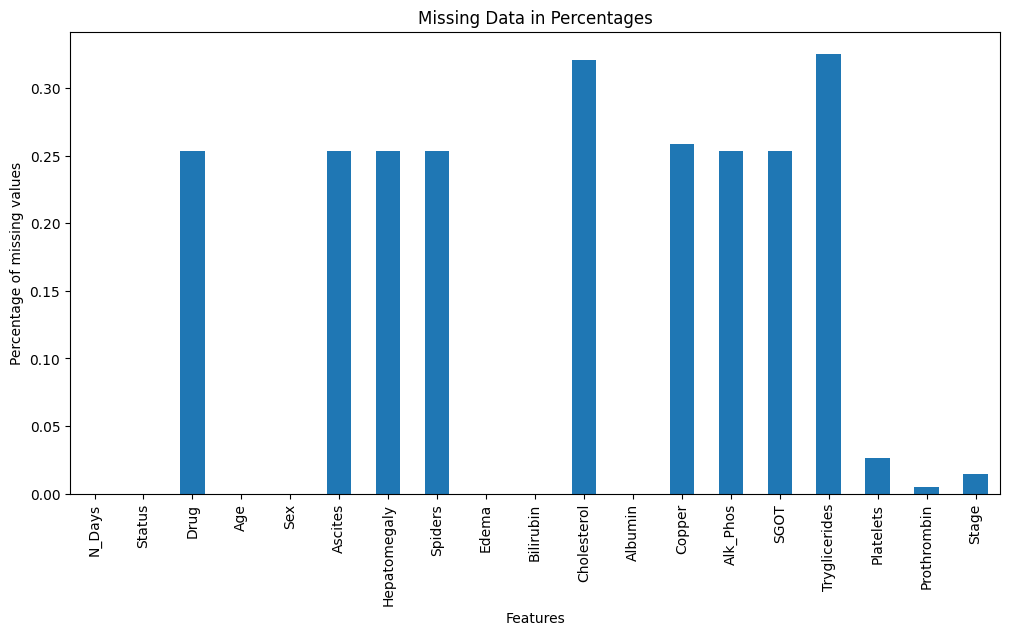

In [8]:
df.isnull().mean().plot.bar(figsize=(12,6)) 
plt.ylabel('Percentage of missing values') 
plt.xlabel('Features') 
plt.title('Missing Data in Percentages');

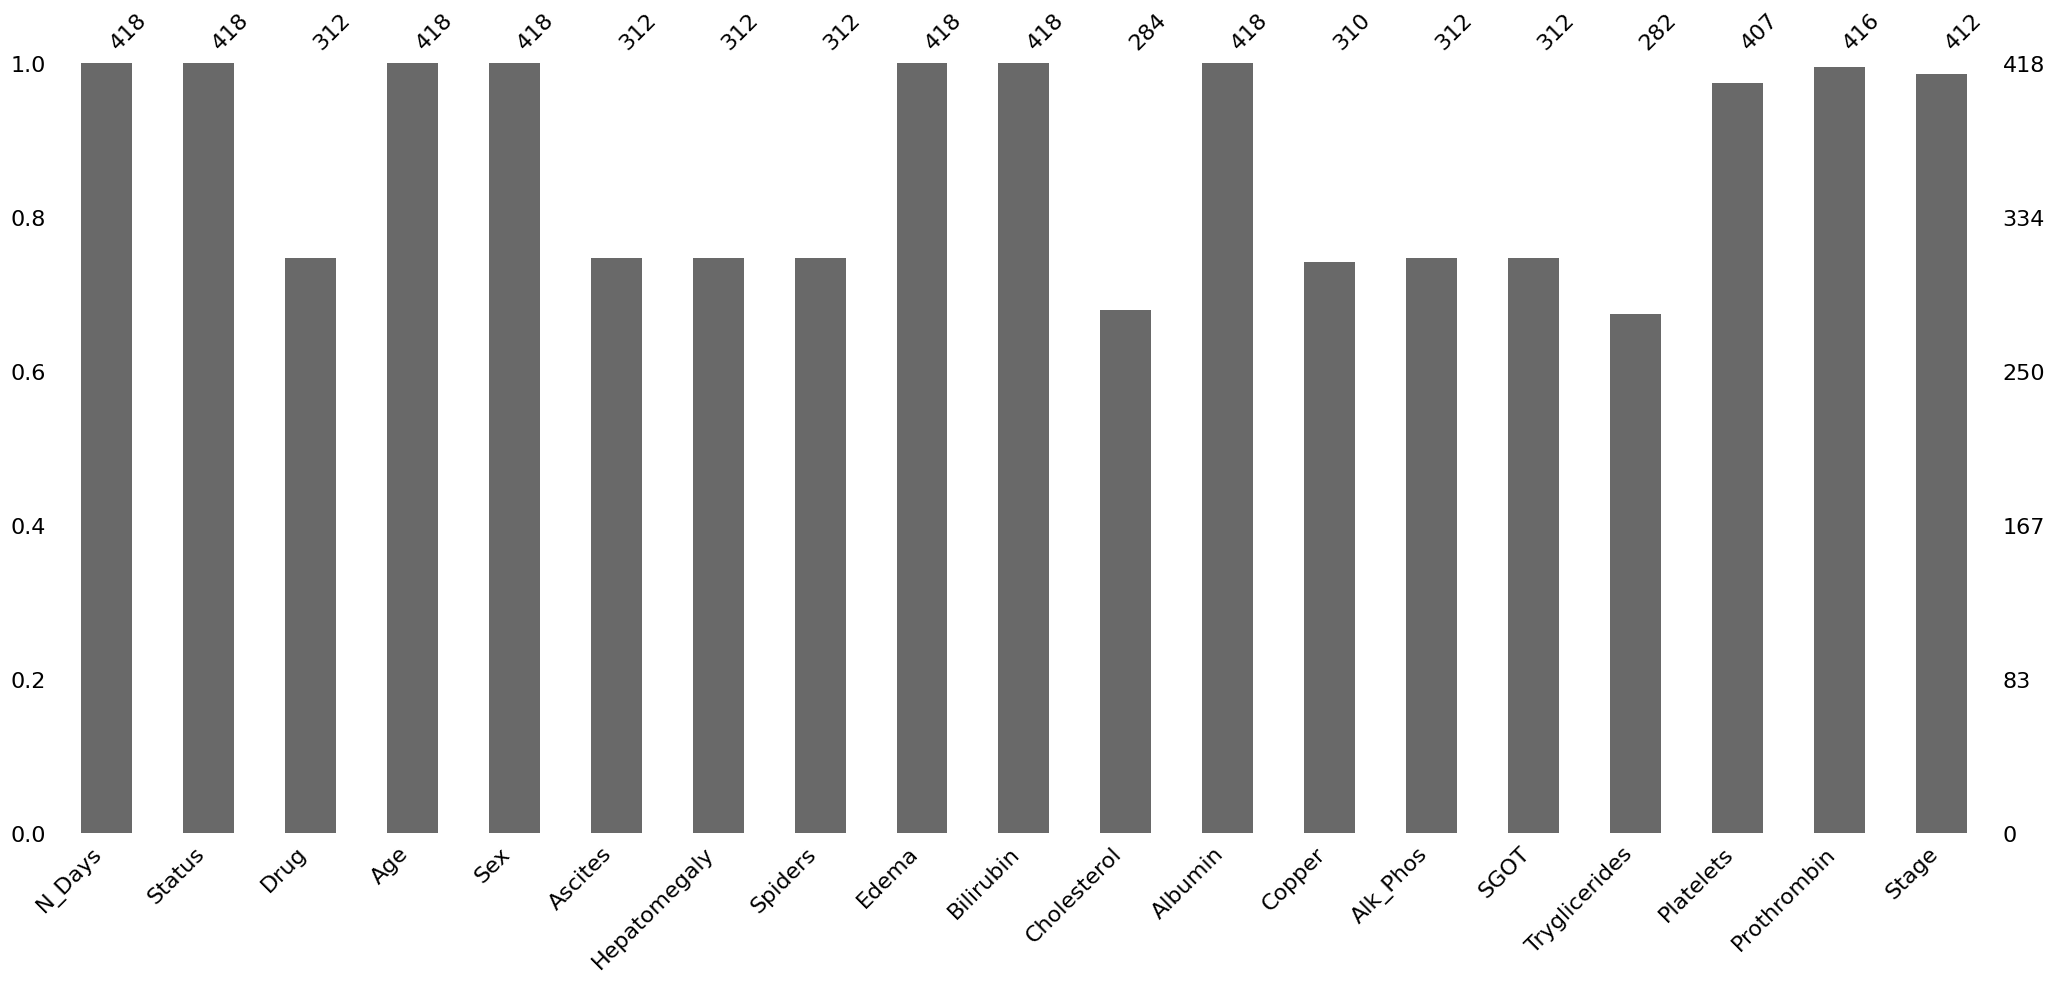

In [9]:
msno.bar(df);

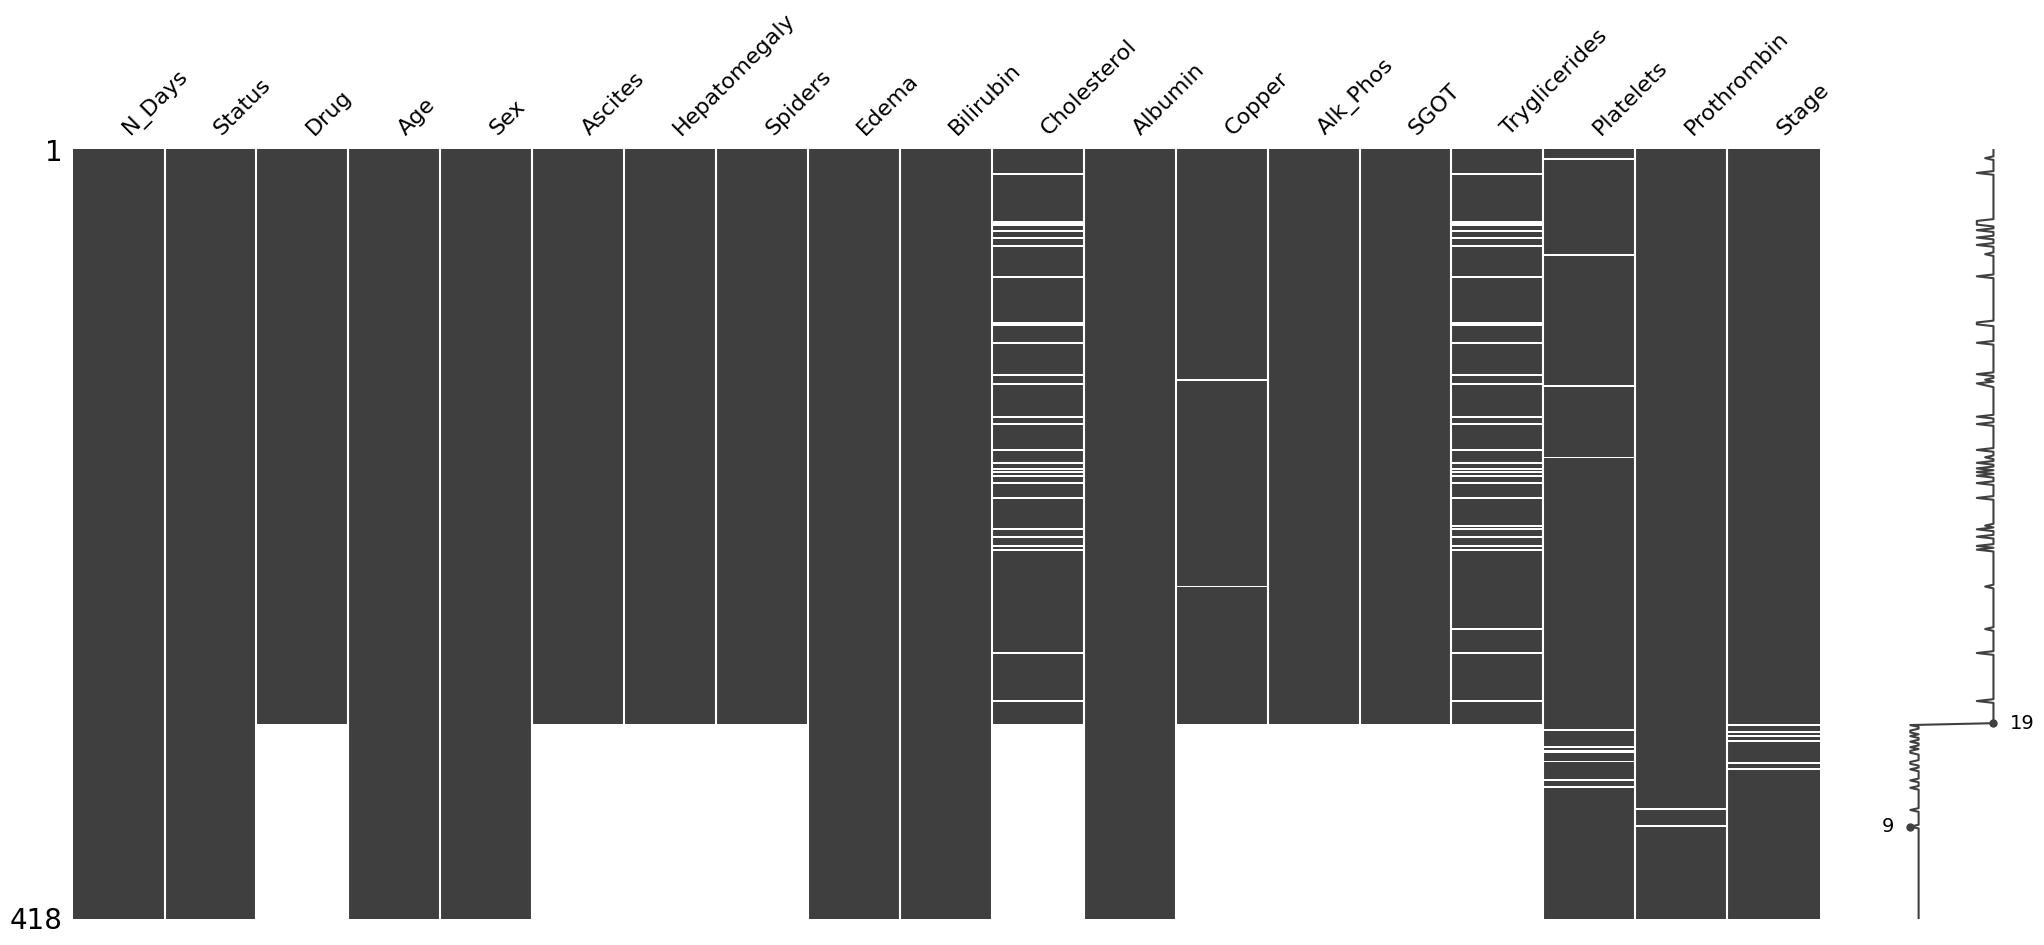

In [10]:
msno.matrix(df);

Iz prethodne analize vidimo da postoje nedostajuće vrednosti za više atributa, kako numeričkih, tako i kategoričkih.

In [11]:
# kategoričke kolone
cat_cols = df.select_dtypes(include='object').columns.tolist()
# numeričke kolone
num_cols = df.select_dtypes(exclude='object').columns.tolist()

print(f'Categorical Columns: {cat_cols}')
print(f'Numerical Columns: {num_cols}')

Categorical Columns: ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
Numerical Columns: ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']


In [12]:
# Kolone sa nedostajućim vrednostima
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
print(f'Missing columns: {missing_data_cols}')

Missing columns: ['Drug', 'Ascites', 'Hepatomegaly', 'Spiders', 'Cholesterol', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']


Analiza target atributa Status

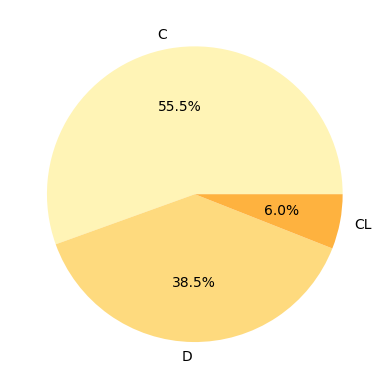

In [13]:
plt.pie(df.Status.value_counts(), labels = ["C", "D", "CL"], colors = sns.color_palette("YlOrBr"), autopct = '%1.1f%%');

U odnosu na target atribut, odnosno klasu, možemo da primetimo da je ovaj dataset nebalansiran, tako da ćemo za potrebe različitih klasifikacionih metoda koristiti accuracy meru, ali i f1-score.

[]

<Figure size 1500x1000 with 0 Axes>

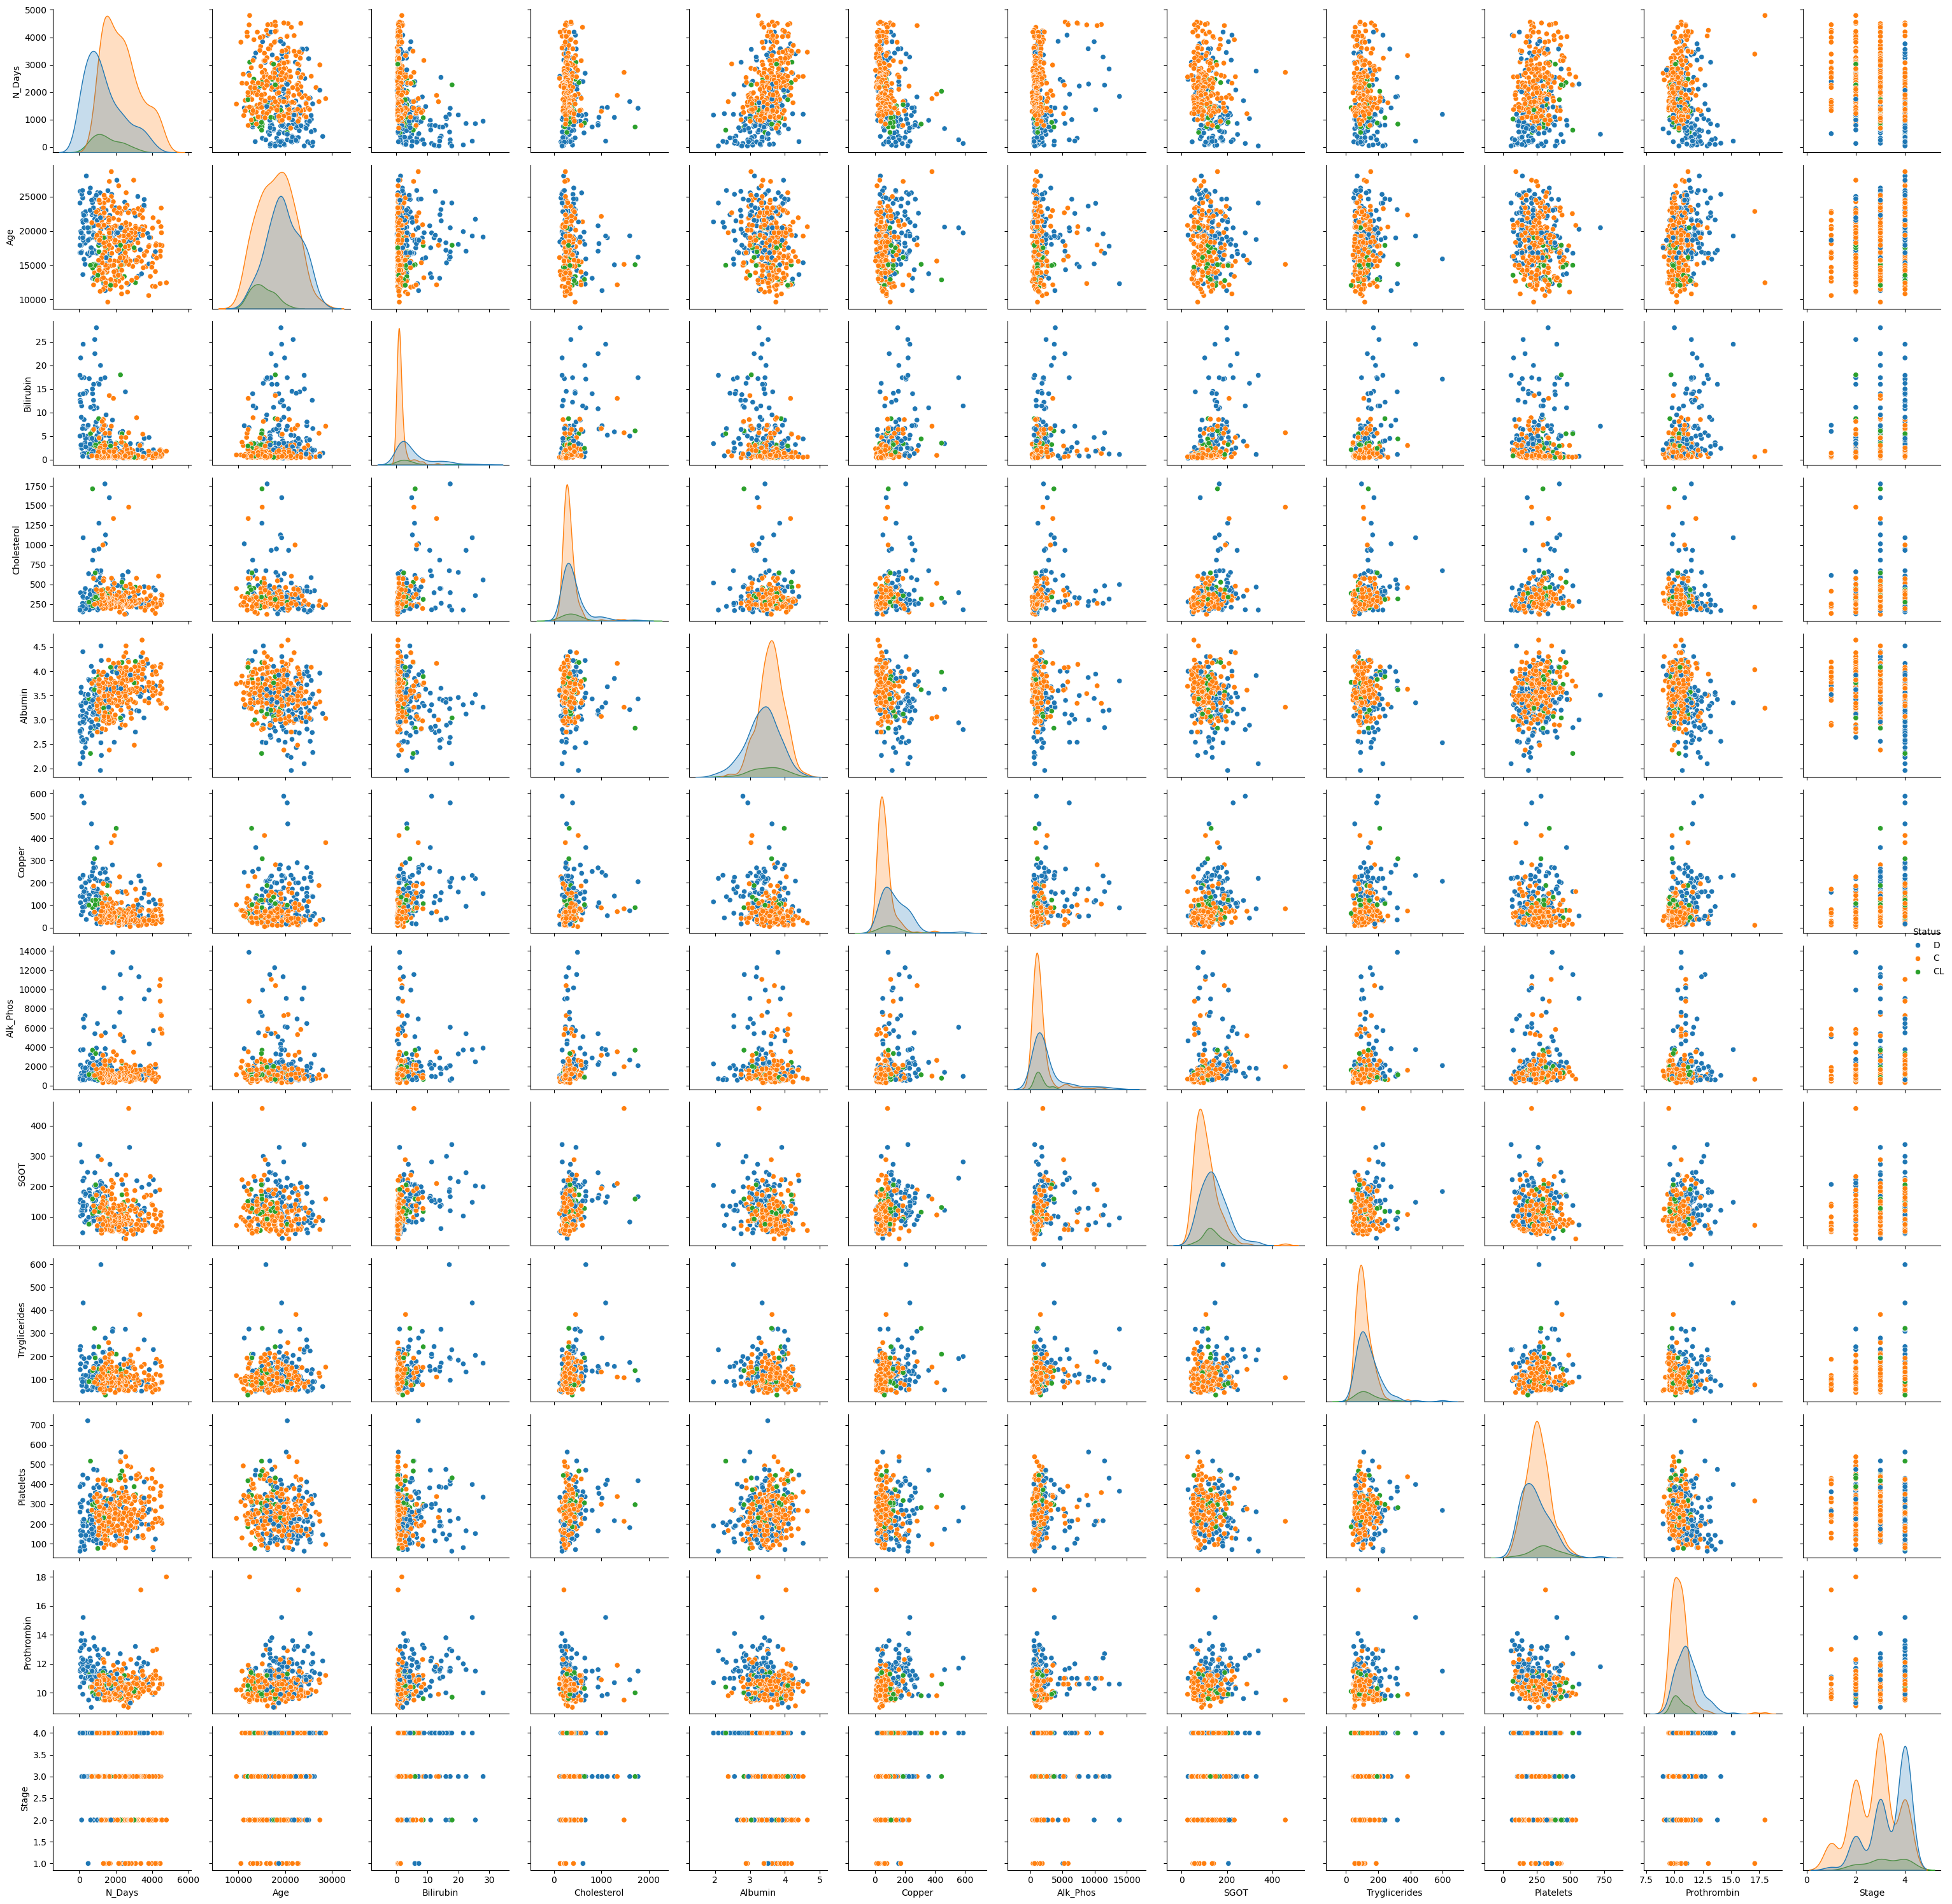

In [14]:
plt.figure(figsize=(15,10))
sns.pairplot(df,hue="Status")
plt.tight_layout()
plt.plot()

Sređivanje (enkodiranje) kategoričkih atributa

In [15]:
print(f'Categorical Columns: {cat_cols}')
print(f'Numerical Columns: {num_cols}')
print(f'Missing data Columns: {missing_data_cols}')

Categorical Columns: ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
Numerical Columns: ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']
Missing data Columns: ['Drug', 'Ascites', 'Hepatomegaly', 'Spiders', 'Cholesterol', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']


In [16]:
missing_cat = ['Drug', 'Ascites', 'Hepatomegaly', 'Spiders']
missing_num = ['Cholesterol', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']

In [17]:
df['Drug'].unique()

array(['D-penicillamine', 'Placebo', nan], dtype=object)

In [18]:
df['Drug'] = df['Drug'].replace(['D-penicillamine', 'Placebo'], [1, 0])

In [19]:
df['Ascites'].unique()

array(['Y', 'N', nan], dtype=object)

In [20]:
df['Ascites'] = df['Ascites'].replace(['Y', 'N'], [1, 0])

In [21]:
df['Status'].unique()

array(['D', 'C', 'CL'], dtype=object)

In [22]:
df['Status'] = df['Status'].replace(['C', 'CL', 'D'], [0, 1, 2])

In [23]:
df['Sex'].unique()

array(['F', 'M'], dtype=object)

In [24]:
df['Sex'] = df['Sex'].replace(['F', 'M'], [0, 1])

In [25]:
df['Hepatomegaly'].unique()

array(['Y', 'N', nan], dtype=object)

In [26]:
df['Hepatomegaly'] = df['Hepatomegaly'].replace(['N', 'Y'], [0, 1])

In [27]:
df['Spiders'].unique()

array(['Y', 'N', nan], dtype=object)

In [28]:
df['Spiders'] = df['Spiders'].replace(['N', 'Y'], [0, 1])

In [29]:
df['Edema'].unique()

array(['Y', 'N', 'S'], dtype=object)

In [30]:
df['Edema'] = df['Edema'].replace(['N', 'S', 'Y'], [0, 1, 2])

In [31]:
df.head()

N_Days  Status  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  \
0     400       2   1.0  21464    0      1.0           1.0      1.0      2   
1    4500       0   1.0  20617    0      0.0           1.0      1.0      0   
2    1012       2   1.0  25594    1      0.0           0.0      0.0      1   
3    1925       2   1.0  19994    0      0.0           1.0      1.0      1   
4    1504       1   0.0  13918    0      0.0           1.0      1.0      0   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0       14.5        261.0     2.60   156.0    1718.0  137.95          172.0   
1        1.1        302.0     4.14    54.0    7394.8  113.52           88.0   
2        1.4        176.0     3.48   210.0     516.0   96.10           55.0   
3        1.8        244.0     2.54    64.0    6121.8   60.63           92.0   
4        3.4        279.0     3.53   143.0     671.0  113.15           72.0   

   Platelets  Prothrombin  Stage  
0      190.0         12.2    4.0  
1      221.0         10.6    3.0  
2      151.0         12.0    4.0  
3      183.0         10.3    4.0  
4      136.0         10.9    3.0

Podela ulaznog skupa podataka na train i test

In [32]:
np.random.seed(42)

X = df.drop('Status', axis=1)
y = df['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [33]:
X_train.head()

N_Days  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  \
336    2286   NaN  20454    0      NaN           NaN      NaN      0   
31     4523   0.0  19722    0      0.0           1.0      0.0      0   
84     3358   0.0  17246    0      0.0           1.0      0.0      0   
287    1067   0.0  17874    0      0.0           1.0      0.0      1   
317    1680   NaN  15706    0      NaN           NaN      NaN      0   

     Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
336        1.8          NaN     3.64     NaN       NaN     NaN            NaN   
31         1.8        262.0     3.34   101.0    7277.0   82.56          158.0   
84         2.1        262.0     3.48    58.0    2045.0   89.90           84.0   
287        8.7        310.0     3.89   107.0     637.0  117.00          242.0   
317        0.7          NaN     3.68     NaN       NaN     NaN            NaN   

     Platelets  Prothrombin  Stage  
336      141.0         10.0    NaN  
31       286.0         10.6    4.0  
84       225.0         11.5    4.0  
287      298.0          9.6    2.0  
317      306.0          9.5    2.0

In [34]:
X_test.head()

N_Days  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  \
321    2011   NaN  23376    0      NaN           NaN      NaN      0   
324    4795   NaN  12419    0      NaN           NaN      NaN      0   
388    1581   NaN  24472    0      NaN           NaN      NaN      0   
56     3282   1.0  19567    0      0.0           1.0      0.0      1   
153     140   1.0  25340    1      0.0           0.0      1.0      2   

     Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
321        1.1          NaN     3.69     NaN       NaN     NaN            NaN   
324        1.8          NaN     3.24     NaN       NaN     NaN            NaN   
388        0.7          NaN     3.06     NaN       NaN     NaN            NaN   
56         2.3        260.0     3.18   231.0   11320.2  105.78           94.0   
153        2.4        168.0     2.56   225.0    1056.0  120.90           75.0   

     Platelets  Prothrombin  Stage  
321      139.0         10.5    NaN  
324        NaN         18.0    2.0  
388      165.0         10.0    4.0  
56       216.0         12.4    3.0  
153      108.0         14.1    3.0

In [35]:
# Procenat nedostajućih podataka u train skupu za svaki atribut
X_train.isnull().mean()*100

N_Days            0.000000
Drug             23.353293
Age               0.000000
Sex               0.000000
Ascites          23.353293
Hepatomegaly     23.353293
Spiders          23.353293
Edema             0.000000
Bilirubin         0.000000
Cholesterol      30.838323
Albumin           0.000000
Copper           23.952096
Alk_Phos         23.353293
SGOT             23.353293
Tryglicerides    31.137725
Platelets         2.694611
Prothrombin       0.299401
Stage             1.197605
dtype: float64

In [36]:
# Procenat nedostajućih podataka u test skupu za svaki atribut
X_test.isnull().mean()*100

N_Days            0.000000
Drug             33.333333
Age               0.000000
Sex               0.000000
Ascites          33.333333
Hepatomegaly     33.333333
Spiders          33.333333
Edema             0.000000
Bilirubin         0.000000
Cholesterol      36.904762
Albumin           0.000000
Copper           33.333333
Alk_Phos         33.333333
SGOT             33.333333
Tryglicerides    38.095238
Platelets         2.380952
Prothrombin       1.190476
Stage             2.380952
dtype: float64

Missing data - Delition strategy

In [37]:
X_train_del = X_train.copy()
X_test_del = X_test.copy()
y_train_del = y_train.copy()
y_test_del = y_test.copy()

X_train_del = X_train_del.dropna()
X_test_del = X_test_del.dropna()

idx = X_train_del.index
y_train_del = y_train_del.loc[idx]
idx = X_test_del.index
y_test_del = y_test_del.loc[idx]

print(f'Pre izbacivanja podataka smo imali {df.shape[0]} instanci')

df_listwise = df.dropna()
print(f'Posle izbacivanja podataka imamo {df_listwise.shape[0]} instanci')

print(f'Izgubili smo {df.shape[0]-df_listwise.shape[0]} instanci, sto znaci %{round((df.shape[0]-df_listwise.shape[0])/ (float(df.shape[0])),2)*100} podataka je izgubljeno')

Pre izbacivanja podataka smo imali 418 instanci
Posle izbacivanja podataka imamo 276 instanci
Izgubili smo 142 instanci, sto znaci %34.0 podataka je izgubljeno


In [38]:
X_train.head()

N_Days  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  \
336    2286   NaN  20454    0      NaN           NaN      NaN      0   
31     4523   0.0  19722    0      0.0           1.0      0.0      0   
84     3358   0.0  17246    0      0.0           1.0      0.0      0   
287    1067   0.0  17874    0      0.0           1.0      0.0      1   
317    1680   NaN  15706    0      NaN           NaN      NaN      0   

     Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
336        1.8          NaN     3.64     NaN       NaN     NaN            NaN   
31         1.8        262.0     3.34   101.0    7277.0   82.56          158.0   
84         2.1        262.0     3.48    58.0    2045.0   89.90           84.0   
287        8.7        310.0     3.89   107.0     637.0  117.00          242.0   
317        0.7          NaN     3.68     NaN       NaN     NaN            NaN   

     Platelets  Prothrombin  Stage  
336      141.0         10.0    NaN  
31       286.0         10.6    4.0  
84       225.0         11.5    4.0  
287      298.0          9.6    2.0  
317      306.0          9.5    2.0

In [39]:
X_train_del.head()

N_Days  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  \
31     4523   0.0  19722    0      0.0           1.0      0.0      0   
84     3358   0.0  17246    0      0.0           1.0      0.0      0   
287    1067   0.0  17874    0      0.0           1.0      0.0      1   
211    2176   0.0  17263    0      0.0           0.0      0.0      0   
45     2256   1.0  16728    0      0.0           1.0      0.0      0   

     Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
31         1.8        262.0     3.34   101.0    7277.0   82.56          158.0   
84         2.1        262.0     3.48    58.0    2045.0   89.90           84.0   
287        8.7        310.0     3.89   107.0     637.0  117.00          242.0   
211        1.2        232.0     3.98    11.0    1074.0  100.75           99.0   
45         5.7        482.0     2.84   161.0   11552.0  136.74          165.0   

     Platelets  Prothrombin  Stage  
31       286.0         10.6    4.0  
84       225.0         11.5    4.0  
287      298.0          9.6    2.0  
211      223.0          9.9    3.0  
45       518.0         12.7    3.0

Missing data - Imputation methods: Mean, Meadian & Mode

In [40]:
# Imputation1: Mode za kategoričke, a Mean za numeričke atribute

X_train_imputation1_df = X_train.copy()

for col in missing_cat:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    X_train_imputation1_df[col] = cat_imputer.fit_transform(X_train_imputation1_df[[col]])

for col in missing_num:
    num_imputer = SimpleImputer(strategy='mean')
    X_train_imputation1_df[col] = num_imputer.fit_transform(X_train_imputation1_df[[col]])

X_train_imputation1_df['Stage'] = X_train_imputation1_df['Stage'].round()

X_train_imputation1_df.head()

N_Days  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  \
336    2286   1.0  20454    0      0.0           0.0      0.0      0   
31     4523   0.0  19722    0      0.0           1.0      0.0      0   
84     3358   0.0  17246    0      0.0           1.0      0.0      0   
287    1067   0.0  17874    0      0.0           1.0      0.0      1   
317    1680   1.0  15706    0      0.0           0.0      0.0      0   

     Bilirubin  Cholesterol  Albumin      Copper    Alk_Phos        SGOT  \
336        1.8   372.805195     3.64   92.905512  1871.60625  117.136016   
31         1.8   262.000000     3.34  101.000000  7277.00000   82.560000   
84         2.1   262.000000     3.48   58.000000  2045.00000   89.900000   
287        8.7   310.000000     3.89  107.000000   637.00000  117.000000   
317        0.7   372.805195     3.68   92.905512  1871.60625  117.136016   

     Tryglicerides  Platelets  Prothrombin  Stage  
336     125.747826      141.0         10.0    3.0  
31      158.000000      286.0         10.6    4.0  
84       84.000000      225.0         11.5    4.0  
287     242.000000      298.0          9.6    2.0  
317     125.747826      306.0          9.5    2.0

In [41]:
# Imputation1: Mode za kategoričke, a Mean za numeričke atribute

X_test_imputation1_df = X_test.copy()

for col in missing_cat:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    X_test_imputation1_df[col] = cat_imputer.fit_transform(X_test_imputation1_df[[col]])

for col in missing_num:
    num_imputer = SimpleImputer(strategy='mean')
    X_test_imputation1_df[col] = num_imputer.fit_transform(X_test_imputation1_df[[col]])

X_test_imputation1_df['Stage'] = X_test_imputation1_df['Stage'].round()

X_test_imputation1_df.head()

N_Days  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  \
321    2011   0.0  23376    0      0.0           1.0      0.0      0   
324    4795   0.0  12419    0      0.0           1.0      0.0      0   
388    1581   0.0  24472    0      0.0           1.0      0.0      0   
56     3282   1.0  19567    0      0.0           1.0      0.0      1   
153     140   1.0  25340    1      0.0           0.0      1.0      2   

     Bilirubin  Cholesterol  Albumin      Copper      Alk_Phos     SGOT  \
321        1.1   355.150943     3.69  119.160714   2490.310714  147.335   
324        1.8   355.150943     3.24  119.160714   2490.310714  147.335   
388        0.7   355.150943     3.06  119.160714   2490.310714  147.335   
56         2.3   260.000000     3.18  231.000000  11320.200000  105.780   
153        2.4   168.000000     2.56  225.000000   1056.000000  120.900   

     Tryglicerides  Platelets  Prothrombin  Stage  
321     120.076923  139.00000         10.5    3.0  
324     120.076923  245.52439         18.0    2.0  
388     120.076923  165.00000         10.0    4.0  
56       94.000000  216.00000         12.4    3.0  
153      75.000000  108.00000         14.1    3.0

In [42]:
# Imputation2: Median za kategoričke, a Mean za numeričke atribute

X_train_imputation2_df = X_train.copy()

for col in missing_cat:
    cat_imputer = SimpleImputer(strategy='median')
    X_train_imputation2_df[col] = cat_imputer.fit_transform(X_train_imputation2_df[[col]])

for col in missing_num:
    num_imputer = SimpleImputer(strategy='mean')
    X_train_imputation2_df[col] = num_imputer.fit_transform(X_train_imputation2_df[[col]])

X_train_imputation2_df['Stage'] = X_train_imputation2_df['Stage'].round()

X_train_imputation2_df.head()

N_Days  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  \
336    2286   1.0  20454    0      0.0           0.5      0.0      0   
31     4523   0.0  19722    0      0.0           1.0      0.0      0   
84     3358   0.0  17246    0      0.0           1.0      0.0      0   
287    1067   0.0  17874    0      0.0           1.0      0.0      1   
317    1680   1.0  15706    0      0.0           0.5      0.0      0   

     Bilirubin  Cholesterol  Albumin      Copper    Alk_Phos        SGOT  \
336        1.8   372.805195     3.64   92.905512  1871.60625  117.136016   
31         1.8   262.000000     3.34  101.000000  7277.00000   82.560000   
84         2.1   262.000000     3.48   58.000000  2045.00000   89.900000   
287        8.7   310.000000     3.89  107.000000   637.00000  117.000000   
317        0.7   372.805195     3.68   92.905512  1871.60625  117.136016   

     Tryglicerides  Platelets  Prothrombin  Stage  
336     125.747826      141.0         10.0    3.0  
31      158.000000      286.0         10.6    4.0  
84       84.000000      225.0         11.5    4.0  
287     242.000000      298.0          9.6    2.0  
317     125.747826      306.0          9.5    2.0

In [43]:
# Imputation2: Median za kategoričke, a Mean za numeričke atribute

X_test_imputation2_df = X_test.copy()

for col in missing_cat:
    cat_imputer = SimpleImputer(strategy='median')
    X_test_imputation2_df[col] = cat_imputer.fit_transform(X_test_imputation2_df[[col]])

for col in missing_num:
    num_imputer = SimpleImputer(strategy='mean')
    X_test_imputation2_df[col] = num_imputer.fit_transform(X_test_imputation2_df[[col]])

X_test_imputation2_df['Stage'] = X_test_imputation2_df['Stage'].round()

X_test_imputation2_df.head()

N_Days  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  \
321    2011   0.0  23376    0      0.0           1.0      0.0      0   
324    4795   0.0  12419    0      0.0           1.0      0.0      0   
388    1581   0.0  24472    0      0.0           1.0      0.0      0   
56     3282   1.0  19567    0      0.0           1.0      0.0      1   
153     140   1.0  25340    1      0.0           0.0      1.0      2   

     Bilirubin  Cholesterol  Albumin      Copper      Alk_Phos     SGOT  \
321        1.1   355.150943     3.69  119.160714   2490.310714  147.335   
324        1.8   355.150943     3.24  119.160714   2490.310714  147.335   
388        0.7   355.150943     3.06  119.160714   2490.310714  147.335   
56         2.3   260.000000     3.18  231.000000  11320.200000  105.780   
153        2.4   168.000000     2.56  225.000000   1056.000000  120.900   

     Tryglicerides  Platelets  Prothrombin  Stage  
321     120.076923  139.00000         10.5    3.0  
324     120.076923  245.52439         18.0    2.0  
388     120.076923  165.00000         10.0    4.0  
56       94.000000  216.00000         12.4    3.0  
153      75.000000  108.00000         14.1    3.0

In [44]:
# Imputation3: Median za kategoričke, a Median za numeričke atribute

X_train_imputation3_df = X_train.copy()

for col in missing_cat:
    cat_imputer = SimpleImputer(strategy='median')
    X_train_imputation3_df[col] = cat_imputer.fit_transform(X_train_imputation3_df[[col]])

for col in missing_num:
    num_imputer = SimpleImputer(strategy='median')
    X_train_imputation3_df[col] = num_imputer.fit_transform(X_train_imputation3_df[[col]])

X_train_imputation3_df['Stage'] = X_train_imputation3_df['Stage'].round()

X_train_imputation3_df.head()

N_Days  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  \
336    2286   1.0  20454    0      0.0           0.5      0.0      0   
31     4523   0.0  19722    0      0.0           1.0      0.0      0   
84     3358   0.0  17246    0      0.0           1.0      0.0      0   
287    1067   0.0  17874    0      0.0           1.0      0.0      1   
317    1680   1.0  15706    0      0.0           0.5      0.0      0   

     Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
336        1.8        308.0     3.64    70.0    1197.0  109.25          111.5   
31         1.8        262.0     3.34   101.0    7277.0   82.56          158.0   
84         2.1        262.0     3.48    58.0    2045.0   89.90           84.0   
287        8.7        310.0     3.89   107.0     637.0  117.00          242.0   
317        0.7        308.0     3.68    70.0    1197.0  109.25          111.5   

     Platelets  Prothrombin  Stage  
336      141.0         10.0    3.0  
31       286.0         10.6    4.0  
84       225.0         11.5    4.0  
287      298.0          9.6    2.0  
317      306.0          9.5    2.0

In [45]:
# Imputation3: Median za kategoričke, a Median za numeričke atribute

X_test_imputation3_df = X_test.copy()

for col in missing_cat:
    cat_imputer = SimpleImputer(strategy='median')
    X_test_imputation3_df[col] = cat_imputer.fit_transform(X_test_imputation3_df[[col]])

for col in missing_num:
    num_imputer = SimpleImputer(strategy='median')
    X_test_imputation3_df[col] = num_imputer.fit_transform(X_test_imputation3_df[[col]])

X_test_imputation3_df['Stage'] = X_test_imputation3_df['Stage'].round()

X_test_imputation3_df.head()

N_Days  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  \
321    2011   0.0  23376    0      0.0           1.0      0.0      0   
324    4795   0.0  12419    0      0.0           1.0      0.0      0   
388    1581   0.0  24472    0      0.0           1.0      0.0      0   
56     3282   1.0  19567    0      0.0           1.0      0.0      1   
153     140   1.0  25340    1      0.0           0.0      1.0      2   

     Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
321        1.1        316.0     3.69    78.0    1654.0  141.05          103.0   
324        1.8        316.0     3.24    78.0    1654.0  141.05          103.0   
388        0.7        316.0     3.06    78.0    1654.0  141.05          103.0   
56         2.3        260.0     3.18   231.0   11320.2  105.78           94.0   
153        2.4        168.0     2.56   225.0    1056.0  120.90           75.0   

     Platelets  Prothrombin  Stage  
321      139.0         10.5    3.0  
324      228.0         18.0    2.0  
388      165.0         10.0    4.0  
56       216.0         12.4    3.0  
153      108.0         14.1    3.0

In [46]:
# Imputation4: Mode za kategoričke, a Mode za numeričke atribute

X_train_imputation4_df = X_train.copy()

for col in missing_cat:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    X_train_imputation4_df[col] = cat_imputer.fit_transform(X_train_imputation4_df[[col]])

for col in missing_num:
    num_imputer = SimpleImputer(strategy='most_frequent')
    X_train_imputation4_df[col] = num_imputer.fit_transform(X_train_imputation4_df[[col]])

X_train_imputation4_df['Stage'] = X_train_imputation4_df['Stage'].round()

X_train_imputation4_df.head()

N_Days  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  \
336    2286   1.0  20454    0      0.0           0.0      0.0      0   
31     4523   0.0  19722    0      0.0           1.0      0.0      0   
84     3358   0.0  17246    0      0.0           1.0      0.0      0   
287    1067   0.0  17874    0      0.0           1.0      0.0      1   
317    1680   1.0  15706    0      0.0           0.0      0.0      0   

     Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
336        1.8        232.0     3.64    52.0     559.0   71.30           90.0   
31         1.8        262.0     3.34   101.0    7277.0   82.56          158.0   
84         2.1        262.0     3.48    58.0    2045.0   89.90           84.0   
287        8.7        310.0     3.89   107.0     637.0  117.00          242.0   
317        0.7        232.0     3.68    52.0     559.0   71.30           90.0   

     Platelets  Prothrombin  Stage  
336      141.0         10.0    3.0  
31       286.0         10.6    4.0  
84       225.0         11.5    4.0  
287      298.0          9.6    2.0  
317      306.0          9.5    2.0

In [47]:
# Imputation4: Mode za kategoričke, a Mode za numeričke atribute

X_test_imputation4_df = X_test.copy()

for col in missing_cat:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    X_test_imputation4_df[col] = cat_imputer.fit_transform(X_test_imputation4_df[[col]])

for col in missing_num:
    num_imputer = SimpleImputer(strategy='most_frequent')
    X_test_imputation4_df[col] = num_imputer.fit_transform(X_test_imputation4_df[[col]])

X_test_imputation4_df['Stage'] = X_test_imputation4_df['Stage'].round()

X_test_imputation4_df.head()

N_Days  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  \
321    2011   0.0  23376    0      0.0           1.0      0.0      0   
324    4795   0.0  12419    0      0.0           1.0      0.0      0   
388    1581   0.0  24472    0      0.0           1.0      0.0      0   
56     3282   1.0  19567    0      0.0           1.0      0.0      1   
153     140   1.0  25340    1      0.0           0.0      1.0      2   

     Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
321        1.1        242.0     3.69    38.0     423.0  170.50           56.0   
324        1.8        242.0     3.24    38.0     423.0  170.50           56.0   
388        0.7        242.0     3.06    38.0     423.0  170.50           56.0   
56         2.3        260.0     3.18   231.0   11320.2  105.78           94.0   
153        2.4        168.0     2.56   225.0    1056.0  120.90           75.0   

     Platelets  Prothrombin  Stage  
321      139.0         10.5    3.0  
324      114.0         18.0    2.0  
388      165.0         10.0    4.0  
56       216.0         12.4    3.0  
153      108.0         14.1    3.0

In [48]:
# Imputation5: Mode za kategoričke, a Median za numeričke atribute

X_train_imputation5_df = X_train.copy()

for col in missing_cat:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    X_train_imputation5_df[col] = cat_imputer.fit_transform(X_train_imputation5_df[[col]])

for col in missing_num:
    num_imputer = SimpleImputer(strategy='median')
    X_train_imputation5_df[col] = num_imputer.fit_transform(X_train_imputation5_df[[col]])

X_train_imputation5_df['Stage'] = X_train_imputation5_df['Stage'].round()

X_train_imputation5_df.head()

N_Days  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  \
336    2286   1.0  20454    0      0.0           0.0      0.0      0   
31     4523   0.0  19722    0      0.0           1.0      0.0      0   
84     3358   0.0  17246    0      0.0           1.0      0.0      0   
287    1067   0.0  17874    0      0.0           1.0      0.0      1   
317    1680   1.0  15706    0      0.0           0.0      0.0      0   

     Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
336        1.8        308.0     3.64    70.0    1197.0  109.25          111.5   
31         1.8        262.0     3.34   101.0    7277.0   82.56          158.0   
84         2.1        262.0     3.48    58.0    2045.0   89.90           84.0   
287        8.7        310.0     3.89   107.0     637.0  117.00          242.0   
317        0.7        308.0     3.68    70.0    1197.0  109.25          111.5   

     Platelets  Prothrombin  Stage  
336      141.0         10.0    3.0  
31       286.0         10.6    4.0  
84       225.0         11.5    4.0  
287      298.0          9.6    2.0  
317      306.0          9.5    2.0

In [49]:
# Imputation5: Mode za kategoričke, a Median za numeričke atribute

X_test_imputation5_df = X_test.copy()

for col in missing_cat:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    X_test_imputation5_df[col] = cat_imputer.fit_transform(X_test_imputation5_df[[col]])

for col in missing_num:
    num_imputer = SimpleImputer(strategy='median')
    X_test_imputation5_df[col] = num_imputer.fit_transform(X_test_imputation5_df[[col]])

X_test_imputation5_df['Stage'] = X_test_imputation5_df['Stage'].round()

X_test_imputation5_df.head()

N_Days  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  \
321    2011   0.0  23376    0      0.0           1.0      0.0      0   
324    4795   0.0  12419    0      0.0           1.0      0.0      0   
388    1581   0.0  24472    0      0.0           1.0      0.0      0   
56     3282   1.0  19567    0      0.0           1.0      0.0      1   
153     140   1.0  25340    1      0.0           0.0      1.0      2   

     Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
321        1.1        316.0     3.69    78.0    1654.0  141.05          103.0   
324        1.8        316.0     3.24    78.0    1654.0  141.05          103.0   
388        0.7        316.0     3.06    78.0    1654.0  141.05          103.0   
56         2.3        260.0     3.18   231.0   11320.2  105.78           94.0   
153        2.4        168.0     2.56   225.0    1056.0  120.90           75.0   

     Platelets  Prothrombin  Stage  
321      139.0         10.5    3.0  
324      228.0         18.0    2.0  
388      165.0         10.0    4.0  
56       216.0         12.4    3.0  
153      108.0         14.1    3.0

In [50]:
# Imputation6: Median za kategoričke, a Mode za numeričke atribute

X_train_imputation6_df = X_train.copy()

for col in missing_cat:
    cat_imputer = SimpleImputer(strategy='median')
    X_train_imputation6_df[col] = cat_imputer.fit_transform(X_train_imputation6_df[[col]])

for col in missing_num:
    num_imputer = SimpleImputer(strategy='most_frequent')
    X_train_imputation6_df[col] = num_imputer.fit_transform(X_train_imputation6_df[[col]])

X_train_imputation6_df['Stage'] = X_train_imputation6_df['Stage'].round()

X_train_imputation6_df.head()

N_Days  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  \
336    2286   1.0  20454    0      0.0           0.5      0.0      0   
31     4523   0.0  19722    0      0.0           1.0      0.0      0   
84     3358   0.0  17246    0      0.0           1.0      0.0      0   
287    1067   0.0  17874    0      0.0           1.0      0.0      1   
317    1680   1.0  15706    0      0.0           0.5      0.0      0   

     Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
336        1.8        232.0     3.64    52.0     559.0   71.30           90.0   
31         1.8        262.0     3.34   101.0    7277.0   82.56          158.0   
84         2.1        262.0     3.48    58.0    2045.0   89.90           84.0   
287        8.7        310.0     3.89   107.0     637.0  117.00          242.0   
317        0.7        232.0     3.68    52.0     559.0   71.30           90.0   

     Platelets  Prothrombin  Stage  
336      141.0         10.0    3.0  
31       286.0         10.6    4.0  
84       225.0         11.5    4.0  
287      298.0          9.6    2.0  
317      306.0          9.5    2.0

In [51]:
# Imputation6: Median za kategoričke, a Mode za numeričke atribute

X_test_imputation6_df = X_test.copy()

for col in missing_cat:
    cat_imputer = SimpleImputer(strategy='median')
    X_test_imputation6_df[col] = cat_imputer.fit_transform(X_test_imputation6_df[[col]])

for col in missing_num:
    num_imputer = SimpleImputer(strategy='most_frequent')
    X_test_imputation6_df[col] = num_imputer.fit_transform(X_test_imputation6_df[[col]])

X_test_imputation6_df['Stage'] = X_test_imputation6_df['Stage'].round()

X_test_imputation6_df.head()

N_Days  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  \
321    2011   0.0  23376    0      0.0           1.0      0.0      0   
324    4795   0.0  12419    0      0.0           1.0      0.0      0   
388    1581   0.0  24472    0      0.0           1.0      0.0      0   
56     3282   1.0  19567    0      0.0           1.0      0.0      1   
153     140   1.0  25340    1      0.0           0.0      1.0      2   

     Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
321        1.1        242.0     3.69    38.0     423.0  170.50           56.0   
324        1.8        242.0     3.24    38.0     423.0  170.50           56.0   
388        0.7        242.0     3.06    38.0     423.0  170.50           56.0   
56         2.3        260.0     3.18   231.0   11320.2  105.78           94.0   
153        2.4        168.0     2.56   225.0    1056.0  120.90           75.0   

     Platelets  Prothrombin  Stage  
321      139.0         10.5    3.0  
324      114.0         18.0    2.0  
388      165.0         10.0    4.0  
56       216.0         12.4    3.0  
153      108.0         14.1    3.0

Missing data - Regression imputation

In [52]:
imputer = IterativeImputer(estimator=LinearRegression(), max_iter=1)

train_data = X_train.copy()
test_data = X_test.copy()

imputer.fit(train_data)

X_train_df = imputer.transform(train_data)
X_test_reg_df = imputer.transform(test_data)

X_train_reg_df = pd.DataFrame(data=X_train_df, columns=train_data.columns)

X_train_reg_df['Stage'] = X_train_reg_df['Stage'].round()

X_train_reg_df.iloc[0]

N_Days            2286.000000
Drug                 0.636755
Age              20454.000000
Sex                  0.000000
Ascites              0.024334
Hepatomegaly         0.513126
Spiders              0.279190
Edema                0.000000
Bilirubin            1.800000
Cholesterol        296.835815
Albumin              3.640000
Copper              70.360548
Alk_Phos          1377.041751
SGOT               115.853431
Tryglicerides      112.048283
Platelets          141.000000
Prothrombin         10.000000
Stage                3.000000
Name: 0, dtype: float64

In [53]:
# Sredjivanje popunjenih nedostajucih vrednosti kod kategorickih atributa
print(missing_cat)

for col in missing_cat:
    X_train_reg_df[col] = X_train_reg_df[col].round()

X_train_reg_df.iloc[0]

['Drug', 'Ascites', 'Hepatomegaly', 'Spiders']


N_Days            2286.000000
Drug                 1.000000
Age              20454.000000
Sex                  0.000000
Ascites              0.000000
Hepatomegaly         1.000000
Spiders              0.000000
Edema                0.000000
Bilirubin            1.800000
Cholesterol        296.835815
Albumin              3.640000
Copper              70.360548
Alk_Phos          1377.041751
SGOT               115.853431
Tryglicerides      112.048283
Platelets          141.000000
Prothrombin         10.000000
Stage                3.000000
Name: 0, dtype: float64

In [54]:
X_train_reg_df.head()

N_Days  Drug      Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  \
0  2286.0   1.0  20454.0  0.0      0.0           1.0      0.0    0.0   
1  4523.0   0.0  19722.0  0.0      0.0           1.0      0.0    0.0   
2  3358.0   0.0  17246.0  0.0      0.0           1.0      0.0    0.0   
3  1067.0   0.0  17874.0  0.0      0.0           1.0      0.0    1.0   
4  1680.0   1.0  15706.0  0.0     -0.0           0.0      0.0    0.0   

   Bilirubin  Cholesterol  Albumin      Copper     Alk_Phos        SGOT  \
0        1.8   296.835815     3.64   70.360548  1377.041751  115.853431   
1        1.8   262.000000     3.34  101.000000  7277.000000   82.560000   
2        2.1   262.000000     3.48   58.000000  2045.000000   89.900000   
3        8.7   310.000000     3.89  107.000000   637.000000  117.000000   
4        0.7   366.337924     3.68   73.591503  1283.571302  105.760051   

   Tryglicerides  Platelets  Prothrombin  Stage  
0     112.048283      141.0         10.0    3.0  
1     158.000000      286.0         10.6    4.0  
2      84.000000      225.0         11.5    4.0  
3     242.000000      298.0          9.6    2.0  
4     112.301791      306.0          9.5    2.0

Missing data - KNN imputation

In [55]:
train_data = X_train.copy()
test_data = X_test.copy()

imputer = KNNImputer(n_neighbors=5)
imputer.fit(train_data)

X_train_knn = imputer.transform(train_data)
X_test_knn_df = imputer.transform(test_data)

X_train_knn_df = pd.DataFrame(data=X_train_knn, columns=X_train.columns)

X_train_knn_df['Stage'] = X_train_knn_df['Stage'].round()

X_train_knn_df.iloc[0]

N_Days            2286.000
Drug                 0.600
Age              20454.000
Sex                  0.000
Ascites              0.000
Hepatomegaly         0.600
Spiders              0.200
Edema                0.000
Bilirubin            1.800
Cholesterol        289.600
Albumin              3.640
Copper              49.800
Alk_Phos          2856.960
SGOT                72.418
Tryglicerides      134.600
Platelets          141.000
Prothrombin         10.000
Stage                3.000
Name: 0, dtype: float64

In [56]:
# Sređivanje vrednosti kategoričkih atributa

for col in missing_cat:
    X_train_knn_df[col] = X_train_knn_df[col].round()

X_train_knn_df.iloc[0]

N_Days            2286.000
Drug                 1.000
Age              20454.000
Sex                  0.000
Ascites              0.000
Hepatomegaly         1.000
Spiders              0.000
Edema                0.000
Bilirubin            1.800
Cholesterol        289.600
Albumin              3.640
Copper              49.800
Alk_Phos          2856.960
SGOT                72.418
Tryglicerides      134.600
Platelets          141.000
Prothrombin         10.000
Stage                3.000
Name: 0, dtype: float64

In [57]:
X_train_knn_df.head()

N_Days  Drug      Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  \
0  2286.0   1.0  20454.0  0.0      0.0           1.0      0.0    0.0   
1  4523.0   0.0  19722.0  0.0      0.0           1.0      0.0    0.0   
2  3358.0   0.0  17246.0  0.0      0.0           1.0      0.0    0.0   
3  1067.0   0.0  17874.0  0.0      0.0           1.0      0.0    1.0   
4  1680.0   0.0  15706.0  0.0      0.0           1.0      1.0    0.0   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos     SGOT  Tryglicerides  \
0        1.8        289.6     3.64    49.8   2856.96   72.418          134.6   
1        1.8        262.0     3.34   101.0   7277.00   82.560          158.0   
2        2.1        262.0     3.48    58.0   2045.00   89.900           84.0   
3        8.7        310.0     3.89   107.0    637.00  117.000          242.0   
4        0.7        437.0     3.68   189.4   2546.20  160.630          208.8   

   Platelets  Prothrombin  Stage  
0      141.0         10.0    3.0  
1      286.0         10.6    4.0  
2      225.0         11.5    4.0  
3      298.0          9.6    2.0  
4      306.0          9.5    2.0

Missing data - MICE imputation

In [58]:
train_data = X_train.copy()
test_data = X_test.copy()

imputer = IterativeImputer(estimator=LinearRegression(), random_state=42, max_iter=20)
imputer.fit(train_data)

X_train_mice = imputer.transform(train_data)
X_test_mice_df = imputer.transform(test_data)

X_train_mice_df = pd.DataFrame(data=X_train_mice, columns=X_train.columns)

X_train_mice_df['Stage'] = X_train_mice_df['Stage'].round()

X_train_mice_df.iloc[0]

N_Days            2286.000000
Drug                 0.598342
Age              20454.000000
Sex                  0.000000
Ascites              0.022299
Hepatomegaly         0.491879
Spiders              0.256542
Edema                0.000000
Bilirubin            1.800000
Cholesterol        289.845190
Albumin              3.640000
Copper              68.193739
Alk_Phos          1174.318555
SGOT               113.321545
Tryglicerides      111.363225
Platelets          141.000000
Prothrombin         10.000000
Stage                3.000000
Name: 0, dtype: float64

In [59]:
# Sređivanje vrednosti kategoričkih atributa

for col in missing_cat:
    X_train_mice_df[col] = X_train_mice_df[col].round()

X_train_mice_df.iloc[0]

N_Days            2286.000000
Drug                 1.000000
Age              20454.000000
Sex                  0.000000
Ascites              0.000000
Hepatomegaly         0.000000
Spiders              0.000000
Edema                0.000000
Bilirubin            1.800000
Cholesterol        289.845190
Albumin              3.640000
Copper              68.193739
Alk_Phos          1174.318555
SGOT               113.321545
Tryglicerides      111.363225
Platelets          141.000000
Prothrombin         10.000000
Stage                3.000000
Name: 0, dtype: float64

In [60]:
X_train_mice_df.head()

N_Days  Drug      Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  \
0  2286.0   1.0  20454.0  0.0      0.0           0.0      0.0    0.0   
1  4523.0   0.0  19722.0  0.0      0.0           1.0      0.0    0.0   
2  3358.0   0.0  17246.0  0.0      0.0           1.0      0.0    0.0   
3  1067.0   0.0  17874.0  0.0      0.0           1.0      0.0    1.0   
4  1680.0   1.0  15706.0  0.0     -0.0           0.0      0.0    0.0   

   Bilirubin  Cholesterol  Albumin      Copper     Alk_Phos        SGOT  \
0        1.8   289.845190     3.64   68.193739  1174.318555  113.321545   
1        1.8   262.000000     3.34  101.000000  7277.000000   82.560000   
2        2.1   262.000000     3.48   58.000000  2045.000000   89.900000   
3        8.7   310.000000     3.89  107.000000   637.000000  117.000000   
4        0.7   360.566549     3.68   70.998083  1112.746296  105.056525   

   Tryglicerides  Platelets  Prothrombin  Stage  
0     111.363225      141.0         10.0    3.0  
1     158.000000      286.0         10.6    4.0  
2      84.000000      225.0         11.5    4.0  
3     242.000000      298.0          9.6    2.0  
4     111.752857      306.0          9.5    2.0

Standardizacija podataka

In [61]:
#Standardizacija nad deletion metodom
scaler = StandardScaler()
scaler.fit(X_train_del)

X_train_del_std = pd.DataFrame(scaler.transform(X_train_del), columns=X_train_del.columns)
X_test_del_std = pd.DataFrame(scaler.transform(X_test_del), columns=X_test_del.columns)

#Standardizacija nad različitim kobinacijama Mean, Median i Mode imputacijama
### Imputation1
scaler = StandardScaler()
scaler.fit(X_train_imputation1_df)

X_train_imputation1_df_std = pd.DataFrame(scaler.transform(X_train_imputation1_df), columns=X_train_imputation1_df.columns)
X_test_imputation1_df_std = pd.DataFrame(scaler.transform(X_test_imputation1_df), columns=X_train_imputation1_df.columns)

### Imputation2

scaler = StandardScaler()
scaler.fit(X_train_imputation2_df)

X_train_imputation2_df_std = pd.DataFrame(scaler.transform(X_train_imputation2_df), columns=X_train_imputation2_df.columns)
X_test_imputation2_df_std = pd.DataFrame(scaler.transform(X_test_imputation2_df), columns=X_train_imputation2_df.columns)

### Imputation3

scaler = StandardScaler()
scaler.fit(X_train_imputation3_df)

X_train_imputation3_df_std = pd.DataFrame(scaler.transform(X_train_imputation3_df), columns=X_train_imputation3_df.columns)
X_test_imputation3_df_std = pd.DataFrame(scaler.transform(X_test_imputation3_df), columns=X_train_imputation3_df.columns)

### Imputation4

scaler = StandardScaler()
scaler.fit(X_train_imputation4_df)

X_train_imputation4_df_std = pd.DataFrame(scaler.transform(X_train_imputation4_df), columns=X_train_imputation4_df.columns)
X_test_imputation4_df_std = pd.DataFrame(scaler.transform(X_test_imputation4_df), columns=X_train_imputation4_df.columns)

### Imputation5

scaler = StandardScaler()
scaler.fit(X_train_imputation5_df)

X_train_imputation5_df_std = pd.DataFrame(scaler.transform(X_train_imputation5_df), columns=X_train_imputation5_df.columns)
X_test_imputation5_df_std = pd.DataFrame(scaler.transform(X_test_imputation5_df), columns=X_train_imputation5_df.columns)

### Imputation6

scaler = StandardScaler()
scaler.fit(X_train_imputation6_df)

X_train_imputation6_df_std = pd.DataFrame(scaler.transform(X_train_imputation6_df), columns=X_train_imputation6_df.columns)
X_test_imputation6_df_std = pd.DataFrame(scaler.transform(X_test_imputation6_df), columns=X_train_imputation6_df.columns)

#Standardizacija nad jednostrukom regresijom
scaler = StandardScaler()
scaler.fit(X_train_reg_df)

X_train_reg_df_std = pd.DataFrame(scaler.transform(X_train_reg_df), columns=X_train_reg_df.columns)
X_test_reg_df_std = pd.DataFrame(scaler.transform(X_test_reg_df), columns=X_train_reg_df.columns)

#Standardizacija nad knn imputacijom
scaler = StandardScaler()
scaler.fit(X_train_knn_df)

X_train_knn_df_std = pd.DataFrame(scaler.transform(X_train_knn_df), columns=X_train_knn_df.columns)
X_test_knn_df_std = pd.DataFrame(scaler.transform(X_test_knn_df), columns=X_train_knn_df.columns)


#Standardizacija nad mice imputacijom
scaler = StandardScaler()
scaler.fit(X_train_mice_df)

X_train_mice_df_std = pd.DataFrame(scaler.transform(X_train_mice_df), columns=X_train_mice_df.columns)
X_test_mice_df_std = pd.DataFrame(scaler.transform(X_test_mice_df), columns=X_train_mice_df.columns)

Klasifikacija <br>

Modeli koji će biti isprobani jesu: <br>
1. Decision tree <br>
2. Random forest <br>
3. Logistic regression <br>
4. MLP

In [62]:
table = pd.DataFrame(columns=["Klasifikacioni algoritam","Metoda", "Kombinovani F-score", "Accuracy"])

Kreiranje modela za Decision tree klasifikaciju

In [63]:
np.random.seed(42)
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 42)
# Podešavanje hiperparametara i kreiranje modela
params = {
            "criterion" : ["gini", "entropy"], 
            "splitter" : ["best", "random"], 
            "max_depth" : [20, 40, None],
            "min_samples_split" : [3, 6], 
            "min_samples_leaf" : [2, 4],  
        }

# Model za deletion
model_del_dt = GridSearchCV(estimator = DecisionTreeClassifier(class_weight = "balanced"), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "roc_auc")
model_del_dt.fit(X_train_del_std, y_train_del)

# Model za imputation1
model_mean1_dt = GridSearchCV(estimator = DecisionTreeClassifier(class_weight = "balanced"), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "roc_auc")
model_mean1_dt.fit(X_train_imputation1_df_std, y_train)

# Model za imputation2
model_mean2_dt = GridSearchCV(estimator = DecisionTreeClassifier(class_weight = "balanced"), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "roc_auc")
model_mean2_dt.fit(X_train_imputation2_df_std, y_train)

# Model za imputation3
model_mean3_dt = GridSearchCV(estimator = DecisionTreeClassifier(class_weight = "balanced"), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "roc_auc")
model_mean3_dt.fit(X_train_imputation3_df_std, y_train)

# Model za imputation4
model_mean4_dt = GridSearchCV(estimator = DecisionTreeClassifier(class_weight = "balanced"), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "roc_auc")
model_mean4_dt.fit(X_train_imputation4_df_std, y_train)

# Model za imputation5
model_mean5_dt = GridSearchCV(estimator = DecisionTreeClassifier(class_weight = "balanced"), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "roc_auc")
model_mean5_dt.fit(X_train_imputation5_df_std, y_train)

# Model za imputation6
model_mean6_dt = GridSearchCV(estimator = DecisionTreeClassifier(class_weight = "balanced"), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "roc_auc")
model_mean6_dt.fit(X_train_imputation6_df_std, y_train)

# Model za jednostruku imputaciju pomocu regresije
model_reg_dt = GridSearchCV(estimator = DecisionTreeClassifier(class_weight = "balanced"), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "roc_auc")
model_reg_dt.fit(X_train_reg_df_std, y_train)

# Model za jednostruku imputaciju pomocu knn
model_knn_dt = GridSearchCV(estimator = DecisionTreeClassifier(class_weight = "balanced"), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "roc_auc")
model_knn_dt.fit(X_train_knn_df_std, y_train)

# Model za mice imputaciju
model_mice_dt = GridSearchCV(estimator = DecisionTreeClassifier(class_weight = "balanced"), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "roc_auc")
model_mice_dt.fit(X_train_mice_df_std, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 40, None],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [3, 6],
                         'splitter': ['best', 'random']},
             scoring='roc_auc')

In [64]:
f1_mera = []
accs = []

Deletion dataset

In [65]:
pred = model_del_dt.predict(X_test_del_std)
acc = accuracy_score(y_test_del, pred)
f1 = f1_score(y_test_del, pred, average='weighted')

accs.append(acc)
f1_mera.append(f1)

print("Kombinovana F mera je : %0.3f" %f1)
print("Accuracy je: %0.3f" %acc)

table.loc[-1] = ["Decision Tree","Deletion", f1, acc]
table.index = table.index + 1
table = table.sort_index()

Kombinovana F mera je : 0.580
Accuracy je: 0.588


Mean, Median i Mode imputation datasetovi

In [66]:
# Imputation1

pred = model_mean1_dt.predict(X_test_imputation1_df_std)
f1 = f1_score(y_test, pred, average='weighted')
acc = accuracy_score(y_test, pred)

accs.append(acc)
f1_mera.append(f1)

print("Kombinovana F mera je : %0.3f" %f1)
print("Accuracy je: %0.3f" %acc)

table.loc[-1] = ["Decision Tree","Imputation1", f1, acc]
table.index = table.index + 1
table = table.sort_index()

Kombinovana F mera je : 0.563
Accuracy je: 0.548


In [67]:
# Imputation2

pred = model_mean2_dt.predict(X_test_imputation2_df_std)
f1 = f1_score(y_test, pred, average='weighted')
acc = accuracy_score(y_test, pred)

accs.append(acc)
f1_mera.append(f1)

print("Kombinovana F mera je : %0.3f" %f1)
print("Accuracy je: %0.3f" %acc)

table.loc[-1] = ["Decision Tree","Imputation2", f1, acc]
table.index = table.index + 1
table = table.sort_index()

Kombinovana F mera je : 0.565
Accuracy je: 0.560


In [68]:
# Imputation3

pred = model_mean3_dt.predict(X_test_imputation3_df_std)
f1 = f1_score(y_test, pred, average='weighted')
acc = accuracy_score(y_test, pred)

accs.append(acc)
f1_mera.append(f1)

print("Kombinovana F mera je : %0.3f" %f1)
print("Accuracy je: %0.3f" %acc)

table.loc[-1] = ["Decision Tree","Imputation3", f1, acc]
table.index = table.index + 1
table = table.sort_index()

Kombinovana F mera je : 0.651
Accuracy je: 0.643


In [69]:
# Imputation4

pred = model_mean4_dt.predict(X_test_imputation4_df_std)
f1 = f1_score(y_test, pred, average='weighted')
acc = accuracy_score(y_test, pred)

accs.append(acc)
f1_mera.append(f1)

print("Kombinovana F mera je : %0.3f" %f1)
print("Accuracy je: %0.3f" %acc)

table.loc[-1] = ["Decision Tree","Imputation4", f1, acc]
table.index = table.index + 1
table = table.sort_index()

Kombinovana F mera je : 0.684
Accuracy je: 0.667


In [70]:
# Imputation5

pred = model_mean5_dt.predict(X_test_imputation5_df_std)
f1 = f1_score(y_test, pred, average='weighted')
acc = accuracy_score(y_test, pred)

accs.append(acc)
f1_mera.append(f1)

print("Kombinovana F mera je : %0.3f" %f1)
print("Accuracy je: %0.3f" %acc)

table.loc[-1] = ["Decision Tree","Imputation5", f1, acc]
table.index = table.index + 1
table = table.sort_index()

Kombinovana F mera je : 0.688
Accuracy je: 0.679


In [71]:
# Imputation6

pred = model_mean6_dt.predict(X_test_imputation6_df_std)
f1 = f1_score(y_test, pred, average='weighted')
acc = accuracy_score(y_test, pred)

accs.append(acc)
f1_mera.append(f1)

print("Kombinovana F mera je : %0.3f" %f1)
print("Accuracy je: %0.3f" %acc)

table.loc[-1] = ["Decision Tree","Imputation6", f1, acc]
table.index = table.index + 1
table = table.sort_index()

Kombinovana F mera je : 0.683
Accuracy je: 0.667


Dataset za imputaciju jednostrukom regresijom

In [72]:
pred = model_reg_dt.predict(X_test_reg_df_std)
f1 = f1_score(y_test, pred, average='weighted')
acc = accuracy_score(y_test, pred)

accs.append(acc)
f1_mera.append(f1)

print("Kombinovana F mera je : %0.3f" %f1)
print("Accuracy je: %0.3f" %acc)

table.loc[-1] = ["Decision Tree","Regression", f1, acc]
table.index = table.index + 1
table = table.sort_index()

Kombinovana F mera je : 0.649
Accuracy je: 0.643


Dataset za KNN imputaciju

In [73]:
pred = model_knn_dt.predict(X_test_knn_df_std)
f1 = f1_score(y_test, pred, average='weighted')
acc = accuracy_score(y_test, pred)

accs.append(acc)
f1_mera.append(f1)

print("Kombinovana F mera je : %0.3f" %f1)
print("Accuracy je: %0.3f" %acc)

table.loc[-1] = ["Decision Tree","KNN", f1, acc]
table.index = table.index + 1
table = table.sort_index()

Kombinovana F mera je : 0.622
Accuracy je: 0.607


Dataset za MICE imputaciju

In [74]:
pred = model_mice_dt.predict(X_test_mice_df_std)
f1 = f1_score(y_test, pred, average='weighted')
acc = accuracy_score(y_test, pred)

accs.append(acc)
f1_mera.append(f1)

print("Kombinovana F mera je : %0.3f" %f1)
print("Accuracy je: %0.3f" %acc)

table.loc[-1] = ["Decision Tree","MICE", f1, acc]
table.index = table.index + 1
table = table.sort_index()

Kombinovana F mera je : 0.679
Accuracy je: 0.667


In [75]:
table

Klasifikacioni algoritam       Metoda  Kombinovani F-score  Accuracy
0            Decision Tree         MICE             0.679272  0.666667
1            Decision Tree          KNN             0.622449  0.607143
2            Decision Tree   Regression             0.649459  0.642857
3            Decision Tree  Imputation6             0.683241  0.666667
4            Decision Tree  Imputation5             0.688091  0.678571
5            Decision Tree  Imputation4             0.683673  0.666667
6            Decision Tree  Imputation3             0.651097  0.642857
7            Decision Tree  Imputation2             0.564538  0.559524
8            Decision Tree  Imputation1             0.563234  0.547619
9            Decision Tree     Deletion             0.580249  0.588235

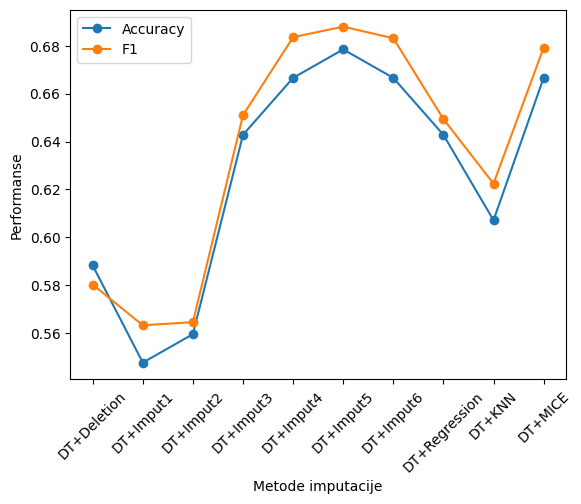

In [76]:
metode = ['DT+Deletion', 'DT+Imput1', 'DT+Imput2', 'DT+Imput3', 'DT+Imput4', 'DT+Imput5', 'DT+Imput6', 'DT+Regression', 'DT+KNN', 'DT+MICE']

plt.plot(metode, accs, marker='o', label='Accuracy')
plt.plot(metode, f1_mera, marker='o', label='F1')
plt.xlabel("Metode imputacije")
plt.ylabel("Performanse")
plt.xticks(rotation=45) 
plt.legend()
plt.show()

Primećuje se da Imputation5 (Mode za kategoričke, a Median za numeričke atribute), kao i MICE daju najbolje rezultate za klasifikacioni metod Decision tree.

Kreiranje modela za Random forest klasifikaciju

In [77]:
np.random.seed(42)

cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 42)
# Podešavanje hiperparametara i kreiranje modela
params = {
            "n_estimators" : [100, 200], 
            "criterion" : ["gini", "entropy"], 
            "max_depth" : [15, 25, None],
            "min_samples_split" : [3, 6], 
            "min_samples_leaf" : [2, 4]
}

#Model za deletion metod
model_del = GridSearchCV(estimator = RandomForestClassifier(class_weight = "balanced", n_jobs = -1, random_state=42), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "roc_auc")
model_del.fit(X_train_del_std, y_train_del)

#Model za Imputation1
model_mean_1 = GridSearchCV(estimator = RandomForestClassifier(class_weight = "balanced", n_jobs = -1, random_state=42), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "roc_auc")
model_mean_1.fit(X_train_imputation1_df_std, y_train)

#Model za Imputation2
model_mean_2 = GridSearchCV(estimator = RandomForestClassifier(class_weight = "balanced", n_jobs = -1, random_state=42), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "roc_auc")
model_mean_2.fit(X_train_imputation2_df_std, y_train)

#Model za Imputation3
model_mean_3 = GridSearchCV(estimator = RandomForestClassifier(class_weight = "balanced", n_jobs = -1, random_state=42), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "roc_auc")
model_mean_3.fit(X_train_imputation3_df_std, y_train)

#Model za Imputation4
model_mean_4 = GridSearchCV(estimator = RandomForestClassifier(class_weight = "balanced", n_jobs = -1, random_state=42), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "roc_auc")
model_mean_4.fit(X_train_imputation4_df_std, y_train)

#Model za Imputation5
model_mean_5 = GridSearchCV(estimator = RandomForestClassifier(class_weight = "balanced", n_jobs = -1, random_state=42), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "roc_auc")
model_mean_5.fit(X_train_imputation5_df_std, y_train)

#Model za Imputation6
model_mean_6 = GridSearchCV(estimator = RandomForestClassifier(class_weight = "balanced", n_jobs = -1, random_state=42), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "roc_auc")
model_mean_6.fit(X_train_imputation6_df_std, y_train)

#Model za jednostruku imputaciju pomocu regresije
model_reg = GridSearchCV(estimator = RandomForestClassifier(class_weight = "balanced", n_jobs = -1, random_state=42), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "roc_auc")
model_reg.fit(X_train_reg_df_std, y_train)

#Model za imputaciju pomocu knn
model_knn = GridSearchCV(estimator = RandomForestClassifier(class_weight = "balanced", n_jobs = -1, random_state=42), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "roc_auc")
model_knn.fit(X_train_knn_df_std, y_train)

#Model za mice imputaciju
model_mice = GridSearchCV(estimator = RandomForestClassifier(class_weight = "balanced", n_jobs = -1, random_state=42), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "roc_auc")
model_mice.fit(X_train_mice_df_std, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 25, None],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [3, 6],
                         'n_estimators': [100, 200]},
             scoring='roc_auc')

In [78]:
f1_mera = []
accs = []

Deletion dataset

In [79]:
pred = model_del.predict(X_test_del_std)
f1 = f1_score(y_test_del, pred, average='weighted')
acc = accuracy_score(y_test_del, pred)

accs.append(acc)
f1_mera.append(f1)

print("Kombinovana F mera je : %0.3f" %f1)
print("Accuracy je: %0.3f" %acc)

table.loc[-1] = ["Random Forest","Deletion", f1, acc]
table.index = table.index + 1
table = table.sort_index()

Kombinovana F mera je : 0.716
Accuracy je: 0.745


Mean, Median i Mode imputation datasetovi

In [80]:
# Imputation1

pred = model_mean_1.predict(X_test_imputation1_df_std)
f1 = f1_score(y_test, pred, average='weighted')
acc = accuracy_score(y_test, pred)

accs.append(acc)
f1_mera.append(f1)

print("Kombinovana F mera je : %0.3f" %f1)
print("Accuracy je: %0.3f" %acc)

table.loc[-1] = ["Random Forest","Imputation1", f1, acc]
table.index = table.index + 1
table = table.sort_index()

Kombinovana F mera je : 0.766
Accuracy je: 0.786


In [81]:
#Imputation2

pred = model_mean_2.predict(X_test_imputation2_df_std)
f1 = f1_score(y_test, pred, average='weighted')
acc = accuracy_score(y_test, pred)

accs.append(acc)
f1_mera.append(f1)

print("Kombinovana F mera je : %0.3f" %f1)
print("Accuracy je: %0.3f" %acc)

table.loc[-1] = ["Random Forest","Imputation2", f1, acc]
table.index = table.index + 1
table = table.sort_index()

Kombinovana F mera je : 0.755
Accuracy je: 0.774


In [82]:
# Imputation3

pred = model_mean_3.predict(X_test_imputation3_df_std)
f1 = f1_score(y_test, pred, average='weighted')
acc = accuracy_score(y_test, pred)

accs.append(acc)
f1_mera.append(f1)

print("Kombinovana F mera je : %0.3f" %f1)
print("Accuracy je: %0.3f" %acc)

table.loc[-1] = ["Random Forest","Imputation3", f1, acc]
table.index = table.index + 1
table = table.sort_index()

Kombinovana F mera je : 0.778
Accuracy je: 0.798


In [83]:
# Imputation4

pred = model_mean_4.predict(X_test_imputation4_df_std)
f1 = f1_score(y_test, pred, average='weighted')
acc = accuracy_score(y_test, pred)

accs.append(acc)
f1_mera.append(f1)

print("Kombinovana F mera je : %0.3f" %f1)
print("Accuracy je: %0.3f" %acc)

table.loc[-1] = ["Random Forest","Imputation4", f1, acc]
table.index = table.index + 1
table = table.sort_index()

Kombinovana F mera je : 0.778
Accuracy je: 0.798


In [84]:
# Imputation5

pred = model_mean_5.predict(X_test_imputation5_df_std)
f1 = f1_score(y_test, pred, average='weighted')
acc = accuracy_score(y_test, pred)

accs.append(acc)
f1_mera.append(f1)

print("Kombinovana F mera je : %0.3f" %f1)
print("Accuracy je: %0.3f" %acc)

table.loc[-1] = ["Random Forest","Imputation5", f1, acc]
table.index = table.index + 1
table = table.sort_index()

Kombinovana F mera je : 0.778
Accuracy je: 0.798


In [85]:
# Imputation6

pred = model_mean_6.predict(X_test_imputation6_df_std)
f1 = f1_score(y_test, pred, average='weighted')
acc = accuracy_score(y_test, pred)

accs.append(acc)
f1_mera.append(f1)

print("Kombinovana F mera je : %0.3f" %f1)
print("Accuracy je: %0.3f" %acc)

table.loc[-1] = ["Random Forest","Imputation6", f1, acc]
table.index = table.index + 1
table = table.sort_index()

Kombinovana F mera je : 0.754
Accuracy je: 0.774


Dataset za imputaciju jednostrukom regresijom

In [86]:
pred = model_reg.predict(X_test_reg_df_std)
f1 = f1_score(y_test, pred, average='weighted')
acc = accuracy_score(y_test, pred)

accs.append(acc)
f1_mera.append(f1)

print("Kombinovana F mera je : %0.3f" %f1)
print("Accuracy je: %0.3f" %acc)

table.loc[-1] = ["Random Forest","Regression", f1, acc]
table.index = table.index + 1
table = table.sort_index()

Kombinovana F mera je : 0.778
Accuracy je: 0.798


Dataset za KNN imputaciju

In [87]:
pred = model_knn.predict(X_test_knn_df_std)
f1 = f1_score(y_test, pred, average='weighted')
acc = accuracy_score(y_test, pred)

accs.append(acc)
f1_mera.append(f1)

print("Kombinovana F mera je : %0.3f" %f1)
print("Accuracy je: %0.3f" %acc)

table.loc[-1] = ["Random Forest","KNN", f1, acc]
table.index = table.index + 1
table = table.sort_index()

Kombinovana F mera je : 0.778
Accuracy je: 0.798


Dataset za MICE imputaciju

In [88]:
pred = model_mice.predict(X_test_mice_df_std)
f1 = f1_score(y_test, pred, average='weighted')
acc = accuracy_score(y_test, pred)

accs.append(acc)
f1_mera.append(f1)

print("Kombinovana F mera je : %0.3f" %f1)
print("Accuracy je: %0.3f" %acc)

table.loc[-1] = ["Random Forest","Mice", f1, acc]
table.index = table.index + 1
table = table.sort_index()

Kombinovana F mera je : 0.765
Accuracy je: 0.786


In [89]:
table

Klasifikacioni algoritam       Metoda  Kombinovani F-score  Accuracy
0             Random Forest         Mice             0.765263  0.785714
1             Random Forest          KNN             0.778178  0.797619
2             Random Forest   Regression             0.777508  0.797619
3             Random Forest  Imputation6             0.754118  0.773810
4             Random Forest  Imputation5             0.778384  0.797619
5             Random Forest  Imputation4             0.777950  0.797619
6             Random Forest  Imputation3             0.778384  0.797619
7             Random Forest  Imputation2             0.755408  0.773810
8             Random Forest  Imputation1             0.766088  0.785714
9             Random Forest     Deletion             0.715686  0.745098
10            Decision Tree         MICE             0.679272  0.666667
11            Decision Tree          KNN             0.622449  0.607143
12            Decision Tree   Regression             0.649459  0.642857
13            Decision Tree  Imputation6             0.683241  0.666667
14            Decision Tree  Imputation5             0.688091  0.678571
15            Decision Tree  Imputation4             0.683673  0.666667
16            Decision Tree  Imputation3             0.651097  0.642857
17            Decision Tree  Imputation2             0.564538  0.559524
18            Decision Tree  Imputation1             0.563234  0.547619
19            Decision Tree     Deletion             0.580249  0.588235

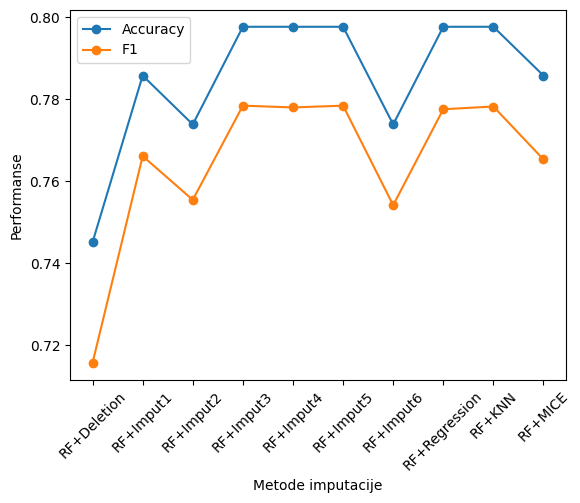

In [90]:
metode = ['RF+Deletion', 'RF+Imput1', 'RF+Imput2', 'RF+Imput3', 'RF+Imput4', 'RF+Imput5', 'RF+Imput6', 'RF+Regression', 'RF+KNN', 'RF+MICE']

plt.plot(metode, accs, marker='o', label='Accuracy')
plt.plot(metode, f1_mera, marker='o', label='F1')
plt.xlabel("Metode imputacije")
plt.ylabel("Performanse")
plt.xticks(rotation=45) 
plt.legend()
plt.show()

Vidimo da Random forest klasifikator, očekivano, radi bolje od Decesion tree klasifikatora za sve skupove podataka, s tim što se ponovo izdvajaju datasetovi za metodama nekih kombinacija Mean, Median i Mode imputacije, kao i Linearna regresija i KNN.

Kreiranje modela za Logistic regression klasifikaciju

In [91]:
f1_mera = []
accs = []

params = [
            {
                "penalty" : ['l2'], 
                "C" : [0.01, 0.1, 1.0, 10.0], 
                "solver" : ["sag"], 
                "max_iter" : [100, 200]
            },
            {
                "penalty" : ['l1'], 
                "C" : [0.01, 0.1, 1.0, 10.0], 
                "solver" : ["saga"], 
                "max_iter" : [100, 200]
            }
]
#Model za deletion dataset
model_del_lr = GridSearchCV(estimator = LogisticRegression(n_jobs = -1, class_weight = "balanced"), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "roc_auc")
model_del_lr.fit(X_train_del_std, y_train_del)

#Model za Imputation1
model_mean1_lr = GridSearchCV(estimator = LogisticRegression(n_jobs = -1, class_weight = "balanced"), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "roc_auc")
model_mean1_lr.fit(X_train_imputation1_df_std, y_train)

#Model za Imputation2
model_mean2_lr = GridSearchCV(estimator = LogisticRegression(n_jobs = -1, class_weight = "balanced"), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "roc_auc")
model_mean2_lr.fit(X_train_imputation2_df_std, y_train)

#Model za Imputation3
model_mean3_lr = GridSearchCV(estimator = LogisticRegression(n_jobs = -1, class_weight = "balanced"), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "roc_auc")
model_mean3_lr.fit(X_train_imputation3_df_std, y_train)

#Model za Imputation4
model_mean4_lr = GridSearchCV(estimator = LogisticRegression(n_jobs = -1, class_weight = "balanced"), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "roc_auc")
model_mean4_lr.fit(X_train_imputation4_df_std, y_train)

#Model za Imputation5
model_mean5_lr = GridSearchCV(estimator = LogisticRegression(n_jobs = -1, class_weight = "balanced"), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "roc_auc")
model_mean5_lr.fit(X_train_imputation5_df_std, y_train)

#Model za Imputation6
model_mean6_lr = GridSearchCV(estimator = LogisticRegression(n_jobs = -1, class_weight = "balanced"), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "roc_auc")
model_mean6_lr.fit(X_train_imputation6_df_std, y_train)

#Model za jednostruku imputaciju pomocu regresije
model_reg_lr = GridSearchCV(estimator = LogisticRegression(n_jobs = -1, class_weight = "balanced"), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "roc_auc")
model_reg_lr.fit(X_train_reg_df_std, y_train)

#Model za jednostruku imputaciju pomocu knn
model_knn_lr = GridSearchCV(estimator = LogisticRegression(n_jobs = -1, class_weight = "balanced"), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "roc_auc")
model_knn_lr.fit(X_train_knn_df_std, y_train)

#Model za mice imputaciju
model_mice_lr = GridSearchCV(estimator = LogisticRegression(n_jobs = -1, class_weight = "balanced"), param_grid = params, cv = cv, 
                   n_jobs = -1, scoring = "roc_auc")
model_mice_lr.fit(X_train_mice_df_std, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced', n_jobs=-1),
             n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1.0, 10.0], 'max_iter': [100, 200],
                          'penalty': ['l2'], 'solver': ['sag']},
                         {'C': [0.01, 0.1, 1.0, 10.0], 'max_iter': [100, 200],
                          'penalty': ['l1'], 'solver': ['saga']}],
             scoring='roc_auc')

Deletion dataset

In [92]:
pred = model_del_lr.predict(X_test_del_std)
f1 = f1_score(y_test_del, pred, average='weighted')
acc = accuracy_score(y_test_del, pred)

accs.append(acc)
f1_mera.append(f1)

print("Kombinovana F mera je : %0.3f" %f1)
print("Accuracy je: %0.3f" %acc)
table.loc[-1] = ["Logistic Regression","Deletion", f1, acc]
table.index = table.index + 1
table = table.sort_index()

Kombinovana F mera je : 0.724
Accuracy je: 0.706


Mean, Median i Mode imputation datasetovi

In [93]:
# Imputation1

pred = model_mean1_lr.predict(X_test_imputation1_df_std)
f1 = f1_score(y_test, pred, average='weighted')
acc = accuracy_score(y_test, pred)

accs.append(acc)
f1_mera.append(f1)

print("Kombinovana F mera je : %0.3f" %f1)
print("Accuracy je: %0.3f" %acc)
table.loc[-1] = ["Logistic Regression","Imputation1", f1, acc]
table.index = table.index + 1
table = table.sort_index()

Kombinovana F mera je : 0.679
Accuracy je: 0.655


In [94]:
# Imputation2

pred = model_mean2_lr.predict(X_test_imputation2_df_std)
f1 = f1_score(y_test, pred, average='weighted')
acc = accuracy_score(y_test, pred)

accs.append(acc)
f1_mera.append(f1)

print("Kombinovana F mera je : %0.3f" %f1)
print("Accuracy je: %0.3f" %acc)
table.loc[-1] = ["Logistic Regression","Imputation2", f1, acc]
table.index = table.index + 1
table = table.sort_index()

Kombinovana F mera je : 0.666
Accuracy je: 0.643


In [95]:
# Imputation3

pred = model_mean3_lr.predict(X_test_imputation3_df_std)
f1 = f1_score(y_test, pred, average='weighted')
acc = accuracy_score(y_test, pred)

accs.append(acc)
f1_mera.append(f1)

print("Kombinovana F mera je : %0.3f" %f1)
print("Accuracy je: %0.3f" %acc)
table.loc[-1] = ["Logistic Regression","Imputation3", f1, acc]
table.index = table.index + 1
table = table.sort_index()

Kombinovana F mera je : 0.660
Accuracy je: 0.631


In [96]:
# Imputation4

pred = model_mean4_lr.predict(X_test_imputation4_df_std)
f1 = f1_score(y_test, pred, average='weighted')
acc = accuracy_score(y_test, pred)

accs.append(acc)
f1_mera.append(f1)

print("Kombinovana F mera je : %0.3f" %f1)
print("Accuracy je: %0.3f" %acc)
table.loc[-1] = ["Logistic Regression","Imputation4", f1, acc]
table.index = table.index + 1
table = table.sort_index()

Kombinovana F mera je : 0.696
Accuracy je: 0.667


In [97]:
# Imputation5

pred = model_mean5_lr.predict(X_test_imputation5_df_std)
f1 = f1_score(y_test, pred, average='weighted')
acc = accuracy_score(y_test, pred)

accs.append(acc)
f1_mera.append(f1)

print("Kombinovana F mera je : %0.3f" %f1)
print("Accuracy je: %0.3f" %acc)
table.loc[-1] = ["Logistic Regression","Imputation5", f1, acc]
table.index = table.index + 1
table = table.sort_index()

Kombinovana F mera je : 0.664
Accuracy je: 0.631


In [98]:
# Imputation6

pred = model_mean6_lr.predict(X_test_imputation6_df_std)
f1 = f1_score(y_test, pred, average='weighted')
acc = accuracy_score(y_test, pred)

accs.append(acc)
f1_mera.append(f1)

print("Kombinovana F mera je : %0.3f" %f1)
print("Accuracy je: %0.3f" %acc)
table.loc[-1] = ["Logistic Regression","Imputation6", f1, acc]
table.index = table.index + 1
table = table.sort_index()

Kombinovana F mera je : 0.683
Accuracy je: 0.655


Dataset za imputaciju jednostrukom regresijom

In [99]:
pred = model_reg_lr.predict(X_test_reg_df_std)
f1 = f1_score(y_test, pred, average='weighted')
acc = accuracy_score(y_test, pred)

accs.append(acc)
f1_mera.append(f1)

print("Kombinovana F mera je : %0.3f" %f1)
print("Accuracy je: %0.3f" %acc)
table.loc[-1] = ["Logistic Regression","Regression", f1, acc]
table.index = table.index + 1
table = table.sort_index()

Kombinovana F mera je : 0.709
Accuracy je: 0.679


Dataset za KNN imputaciju

In [100]:
pred = model_knn_lr.predict(X_test_knn_df_std)
f1 = f1_score(y_test, pred, average='weighted')
acc = accuracy_score(y_test, pred)

accs.append(acc)
f1_mera.append(f1)

print("Kombinovana F mera je : %0.3f" %f1)
print("Accuracy je: %0.3f" %acc)
table.loc[-1] = ["Logistic Regression","KNN", f1, acc]
table.index = table.index + 1
table = table.sort_index()

Kombinovana F mera je : 0.696
Accuracy je: 0.679


Dataset za MICE imputaciju

In [101]:
pred = model_mice_lr.predict(X_test_mice_df_std)
f1 = f1_score(y_test, pred, average='weighted')
acc = accuracy_score(y_test, pred)

accs.append(acc)
f1_mera.append(f1)

print("Kombinovana F mera je : %0.3f" %f1)
print("Accuracy je: %0.3f" %acc)
table.loc[-1] = ["Logistic Regression","Mice", f1, acc]
table.index = table.index + 1
table = table.sort_index()

Kombinovana F mera je : 0.709
Accuracy je: 0.679


In [102]:
table

Klasifikacioni algoritam       Metoda  Kombinovani F-score  Accuracy
0       Logistic Regression         Mice             0.708711  0.678571
1       Logistic Regression          KNN             0.695771  0.678571
2       Logistic Regression   Regression             0.708711  0.678571
3       Logistic Regression  Imputation6             0.683371  0.654762
4       Logistic Regression  Imputation5             0.664004  0.630952
5       Logistic Regression  Imputation4             0.696477  0.666667
6       Logistic Regression  Imputation3             0.660028  0.630952
7       Logistic Regression  Imputation2             0.666140  0.642857
8       Logistic Regression  Imputation1             0.679282  0.654762
9       Logistic Regression     Deletion             0.723818  0.705882
10            Random Forest         Mice             0.765263  0.785714
11            Random Forest          KNN             0.778178  0.797619
12            Random Forest   Regression             0.777508  0.797619
13            Random Forest  Imputation6             0.754118  0.773810
14            Random Forest  Imputation5             0.778384  0.797619
15            Random Forest  Imputation4             0.777950  0.797619
16            Random Forest  Imputation3             0.778384  0.797619
17            Random Forest  Imputation2             0.755408  0.773810
18            Random Forest  Imputation1             0.766088  0.785714
19            Random Forest     Deletion             0.715686  0.745098
20            Decision Tree         MICE             0.679272  0.666667
21            Decision Tree          KNN             0.622449  0.607143
22            Decision Tree   Regression             0.649459  0.642857
23            Decision Tree  Imputation6             0.683241  0.666667
24            Decision Tree  Imputation5             0.688091  0.678571
25            Decision Tree  Imputation4             0.683673  0.666667
26            Decision Tree  Imputation3             0.651097  0.642857
27            Decision Tree  Imputation2             0.564538  0.559524
28            Decision Tree  Imputation1             0.563234  0.547619
29            Decision Tree     Deletion             0.580249  0.588235

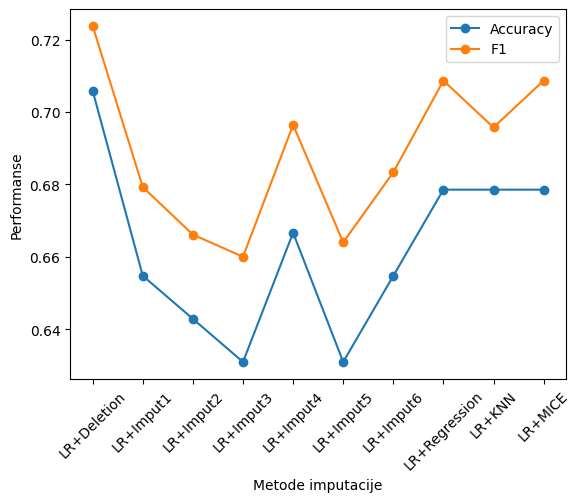

In [103]:
metode = ['LR+Deletion', 'LR+Imput1', 'LR+Imput2', 'LR+Imput3', 'LR+Imput4', 'LR+Imput5', 'LR+Imput6', 'LR+Regression', 'LR+KNN', 'LR+MICE']

plt.plot(metode, accs, marker='o', label='Accuracy')
plt.plot(metode, f1_mera, marker='o', label='F1')
plt.xlabel("Metode imputacije")
plt.ylabel("Performanse")
plt.xticks(rotation=45) 
plt.legend()
plt.show()

Zanimljivo je primetiti da u ovom slučaju, kada koristimo Logistic regression klasifikator, deletion metoda zapravo daje bolje reultate od ostalih metoda. Među boljima se nalaze i Imputation3, regresija i MICE.

Kreiranje modela za MLP (MultiLayer Perceptron) klasifikaciju

In [104]:
f1_mera = []
accs = []

#Model za deletion dataset
model_del_mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, learning_rate='adaptive')
model_del_mlp.fit(X_train_del, y_train_del)

#Model za Imputation1
model_mean1_mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, learning_rate='adaptive')
model_mean1_mlp.fit(X_train_imputation1_df_std, y_train)

#Model za Imputation2
model_mean2_mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, learning_rate='adaptive')
model_mean2_mlp.fit(X_train_imputation2_df_std, y_train)

#Model za Imputation3
model_mean3_mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, learning_rate='adaptive')
model_mean3_mlp.fit(X_train_imputation3_df_std, y_train)

#Model za Imputation4
model_mean4_mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, learning_rate='adaptive')
model_mean4_mlp.fit(X_train_imputation4_df_std, y_train)

#Model za Imputation5
model_mean5_mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, learning_rate='adaptive')
model_mean5_mlp.fit(X_train_imputation5_df_std, y_train)

#Model za Imputation6
model_mean6_mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, learning_rate='adaptive')
model_mean6_mlp.fit(X_train_imputation6_df_std, y_train)

#Model za jednostruku imputaciju pomocu regresije
model_reg_mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, learning_rate='adaptive')
model_reg_mlp.fit(X_train_reg_df_std, y_train)

#Model za jednostruku imputaciju pomocu knn
model_knn_mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, learning_rate='adaptive')
model_knn_mlp.fit(X_train_knn_df_std, y_train)

#Model za mice imputaciju
model_mice_mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, learning_rate='adaptive')
model_mice_mlp.fit(X_train_mice_df_std, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), learning_rate='adaptive',
              max_iter=500)

Deletion dataset

In [105]:
pred = model_del_mlp.predict(X_test_del_std)
f1 = f1_score(y_test_del, pred, average='weighted')
acc = accuracy_score(y_test_del, pred)

accs.append(acc)
f1_mera.append(f1)

print("Kombinovana F mera je : %0.3f" %f1)
print("Accuracy je: %0.3f" %acc)
table.loc[-1] = ["MLP","Deletion", f1, acc]
table.index = table.index + 1
table = table.sort_index()

Kombinovana F mera je : 0.436
Accuracy je: 0.451


Dataset za Mean, Median i Mode imputaciju

In [106]:
# Imputation1

pred = model_mean1_mlp.predict(X_test_imputation1_df_std)
f1 = f1_score(y_test, pred, average='weighted')
acc = accuracy_score(y_test, pred)

accs.append(acc)
f1_mera.append(f1)

print("Kombinovana F mera je : %0.3f" %f1)
print("Accuracy je: %0.3f" %acc)
table.loc[-1] = ["MLP","Imputation1", f1, acc]
table.index = table.index + 1
table = table.sort_index()

Kombinovana F mera je : 0.715
Accuracy je: 0.726


In [107]:
# Imputation2

pred = model_mean2_mlp.predict(X_test_imputation2_df_std)
f1 = f1_score(y_test, pred, average='weighted')
acc = accuracy_score(y_test, pred)

accs.append(acc)
f1_mera.append(f1)

print("Kombinovana F mera je : %0.3f" %f1)
print("Accuracy je: %0.3f" %acc)
table.loc[-1] = ["MLP","Imputation2", f1, acc]
table.index = table.index + 1
table = table.sort_index()

Kombinovana F mera je : 0.741
Accuracy je: 0.750


In [108]:
# Imputation3

pred = model_mean3_mlp.predict(X_test_imputation3_df_std)
f1 = f1_score(y_test, pred, average='weighted')
acc = accuracy_score(y_test, pred)

accs.append(acc)
f1_mera.append(f1)

print("Kombinovana F mera je : %0.3f" %f1)
print("Accuracy je: %0.3f" %acc)
table.loc[-1] = ["MLP","Imputation3", f1, acc]
table.index = table.index + 1
table = table.sort_index()

Kombinovana F mera je : 0.708
Accuracy je: 0.726


In [109]:
# Imputation4

pred = model_mean4_mlp.predict(X_test_imputation4_df_std)
f1 = f1_score(y_test, pred, average='weighted')
acc = accuracy_score(y_test, pred)

accs.append(acc)
f1_mera.append(f1)

print("Kombinovana F mera je : %0.3f" %f1)
print("Accuracy je: %0.3f" %acc)
table.loc[-1] = ["MLP","Imputation4", f1, acc]
table.index = table.index + 1
table = table.sort_index()

Kombinovana F mera je : 0.766
Accuracy je: 0.774


In [110]:
# Imputation5

pred = model_mean5_mlp.predict(X_test_imputation5_df_std)
f1 = f1_score(y_test, pred, average='weighted')
acc = accuracy_score(y_test, pred)

accs.append(acc)
f1_mera.append(f1)

print("Kombinovana F mera je : %0.3f" %f1)
print("Accuracy je: %0.3f" %acc)
table.loc[-1] = ["MLP","Imputation5", f1, acc]
table.index = table.index + 1
table = table.sort_index()

Kombinovana F mera je : 0.732
Accuracy je: 0.738


In [111]:
# Imputation6

pred = model_mean6_mlp.predict(X_test_imputation6_df_std)
f1 = f1_score(y_test, pred, average='weighted')
acc = accuracy_score(y_test, pred)

accs.append(acc)
f1_mera.append(f1)

print("Kombinovana F mera je : %0.3f" %f1)
print("Accuracy je: %0.3f" %acc)
table.loc[-1] = ["MLP","Imputation6", f1, acc]
table.index = table.index + 1
table = table.sort_index()

Kombinovana F mera je : 0.717
Accuracy je: 0.726


Dataset za imputaciju jednostrukom regresijom

In [112]:
pred = model_reg_mlp.predict(X_test_reg_df_std)
f1 = f1_score(y_test, pred, average='weighted')
acc = accuracy_score(y_test, pred)

accs.append(acc)
f1_mera.append(f1)

print("Kombinovana F mera je : %0.3f" %f1)
print("Accuracy je: %0.3f" %acc)
table.loc[-1] = ["MLP","Regression", f1, acc]
table.index = table.index + 1
table = table.sort_index()

Kombinovana F mera je : 0.769
Accuracy je: 0.774


Dataset za KNN imputaciju

In [113]:
pred = model_knn_mlp.predict(X_test_knn_df_std)
f1 = f1_score(y_test, pred, average='weighted')
acc = accuracy_score(y_test, pred)

accs.append(acc)
f1_mera.append(f1)

print("Kombinovana F mera je : %0.3f" %f1)
print("Accuracy je: %0.3f" %acc)
table.loc[-1] = ["MLP","KNN", f1, acc]
table.index = table.index + 1
table = table.sort_index()

Kombinovana F mera je : 0.710
Accuracy je: 0.726


Dataset za MICE imputaciju

In [114]:
pred = model_mice_mlp.predict(X_test_mice_df_std)
f1 = f1_score(y_test, pred, average='weighted')
acc = accuracy_score(y_test, pred)

accs.append(acc)
f1_mera.append(f1)

print("Kombinovana F mera je : %0.3f" %f1)
print("Accuracy je: %0.3f" %acc)
table.loc[-1] = ["MLP","Mice", f1, acc]
table.index = table.index + 1
table = table.sort_index()

Kombinovana F mera je : 0.690
Accuracy je: 0.702


In [115]:
table

Klasifikacioni algoritam       Metoda  Kombinovani F-score  Accuracy
0                       MLP         Mice             0.689765  0.702381
1                       MLP          KNN             0.709686  0.726190
2                       MLP   Regression             0.768872  0.773810
3                       MLP  Imputation6             0.717181  0.726190
4                       MLP  Imputation5             0.732127  0.738095
5                       MLP  Imputation4             0.766328  0.773810
6                       MLP  Imputation3             0.708050  0.726190
7                       MLP  Imputation2             0.740970  0.750000
8                       MLP  Imputation1             0.715418  0.726190
9                       MLP     Deletion             0.436185  0.450980
10      Logistic Regression         Mice             0.708711  0.678571
11      Logistic Regression          KNN             0.695771  0.678571
12      Logistic Regression   Regression             0.708711  0.678571
13      Logistic Regression  Imputation6             0.683371  0.654762
14      Logistic Regression  Imputation5             0.664004  0.630952
15      Logistic Regression  Imputation4             0.696477  0.666667
16      Logistic Regression  Imputation3             0.660028  0.630952
17      Logistic Regression  Imputation2             0.666140  0.642857
18      Logistic Regression  Imputation1             0.679282  0.654762
19      Logistic Regression     Deletion             0.723818  0.705882
20            Random Forest         Mice             0.765263  0.785714
21            Random Forest          KNN             0.778178  0.797619
22            Random Forest   Regression             0.777508  0.797619
23            Random Forest  Imputation6             0.754118  0.773810
24            Random Forest  Imputation5             0.778384  0.797619
25            Random Forest  Imputation4             0.777950  0.797619
26            Random Forest  Imputation3             0.778384  0.797619
27            Random Forest  Imputation2             0.755408  0.773810
28            Random Forest  Imputation1             0.766088  0.785714
29            Random Forest     Deletion             0.715686  0.745098
30            Decision Tree         MICE             0.679272  0.666667
31            Decision Tree          KNN             0.622449  0.607143
32            Decision Tree   Regression             0.649459  0.642857
33            Decision Tree  Imputation6             0.683241  0.666667
34            Decision Tree  Imputation5             0.688091  0.678571
35            Decision Tree  Imputation4             0.683673  0.666667
36            Decision Tree  Imputation3             0.651097  0.642857
37            Decision Tree  Imputation2             0.564538  0.559524
38            Decision Tree  Imputation1             0.563234  0.547619
39            Decision Tree     Deletion             0.580249  0.588235

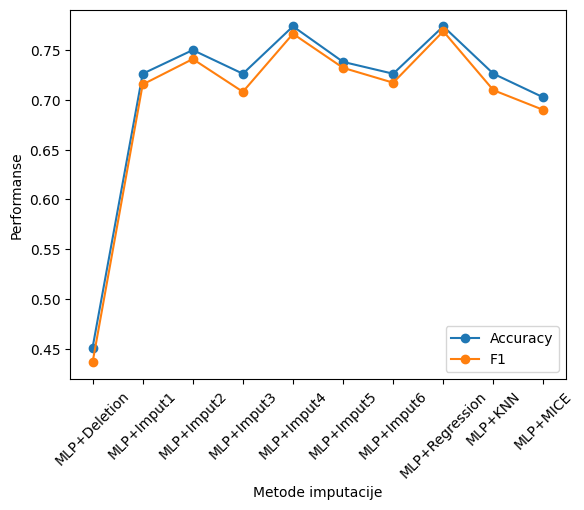

In [116]:
metode = ['MLP+Deletion', 'MLP+Imput1', 'MLP+Imput2', 'MLP+Imput3', 'MLP+Imput4', 'MLP+Imput5', 'MLP+Imput6', 'MLP+Regression', 'MLP+KNN', 'MLP+MICE']

plt.plot(metode, accs, marker='o', label='Accuracy')
plt.plot(metode, f1_mera, marker='o', label='F1')
plt.xlabel("Metode imputacije")
plt.ylabel("Performanse")
plt.xticks(rotation=45) 
plt.legend()
plt.show()

Primećujemo da Imputation3 i regresiona imputacija ovog puta daju bolje rezulatate.

In [117]:
DFAccuracy = table.sort_values("Accuracy",ascending=False)
DFAccuracy

Klasifikacioni algoritam       Metoda  Kombinovani F-score  Accuracy
26            Random Forest  Imputation3             0.778384  0.797619
21            Random Forest          KNN             0.778178  0.797619
22            Random Forest   Regression             0.777508  0.797619
24            Random Forest  Imputation5             0.778384  0.797619
25            Random Forest  Imputation4             0.777950  0.797619
20            Random Forest         Mice             0.765263  0.785714
28            Random Forest  Imputation1             0.766088  0.785714
2                       MLP   Regression             0.768872  0.773810
5                       MLP  Imputation4             0.766328  0.773810
23            Random Forest  Imputation6             0.754118  0.773810
27            Random Forest  Imputation2             0.755408  0.773810
7                       MLP  Imputation2             0.740970  0.750000
29            Random Forest     Deletion             0.715686  0.745098
4                       MLP  Imputation5             0.732127  0.738095
8                       MLP  Imputation1             0.715418  0.726190
6                       MLP  Imputation3             0.708050  0.726190
3                       MLP  Imputation6             0.717181  0.726190
1                       MLP          KNN             0.709686  0.726190
19      Logistic Regression     Deletion             0.723818  0.705882
0                       MLP         Mice             0.689765  0.702381
10      Logistic Regression         Mice             0.708711  0.678571
34            Decision Tree  Imputation5             0.688091  0.678571
12      Logistic Regression   Regression             0.708711  0.678571
11      Logistic Regression          KNN             0.695771  0.678571
30            Decision Tree         MICE             0.679272  0.666667
35            Decision Tree  Imputation4             0.683673  0.666667
15      Logistic Regression  Imputation4             0.696477  0.666667
33            Decision Tree  Imputation6             0.683241  0.666667
18      Logistic Regression  Imputation1             0.679282  0.654762
13      Logistic Regression  Imputation6             0.683371  0.654762
17      Logistic Regression  Imputation2             0.666140  0.642857
32            Decision Tree   Regression             0.649459  0.642857
36            Decision Tree  Imputation3             0.651097  0.642857
14      Logistic Regression  Imputation5             0.664004  0.630952
16      Logistic Regression  Imputation3             0.660028  0.630952
31            Decision Tree          KNN             0.622449  0.607143
39            Decision Tree     Deletion             0.580249  0.588235
37            Decision Tree  Imputation2             0.564538  0.559524
38            Decision Tree  Imputation1             0.563234  0.547619
9                       MLP     Deletion             0.436185  0.450980

In [118]:
DFKombinovanaFMera = table.sort_values("Kombinovani F-score",ascending=False)
DFKombinovanaFMera

Klasifikacioni algoritam       Metoda  Kombinovani F-score  Accuracy
24            Random Forest  Imputation5             0.778384  0.797619
26            Random Forest  Imputation3             0.778384  0.797619
21            Random Forest          KNN             0.778178  0.797619
25            Random Forest  Imputation4             0.777950  0.797619
22            Random Forest   Regression             0.777508  0.797619
2                       MLP   Regression             0.768872  0.773810
5                       MLP  Imputation4             0.766328  0.773810
28            Random Forest  Imputation1             0.766088  0.785714
20            Random Forest         Mice             0.765263  0.785714
27            Random Forest  Imputation2             0.755408  0.773810
23            Random Forest  Imputation6             0.754118  0.773810
7                       MLP  Imputation2             0.740970  0.750000
4                       MLP  Imputation5             0.732127  0.738095
19      Logistic Regression     Deletion             0.723818  0.705882
3                       MLP  Imputation6             0.717181  0.726190
29            Random Forest     Deletion             0.715686  0.745098
8                       MLP  Imputation1             0.715418  0.726190
1                       MLP          KNN             0.709686  0.726190
10      Logistic Regression         Mice             0.708711  0.678571
12      Logistic Regression   Regression             0.708711  0.678571
6                       MLP  Imputation3             0.708050  0.726190
15      Logistic Regression  Imputation4             0.696477  0.666667
11      Logistic Regression          KNN             0.695771  0.678571
0                       MLP         Mice             0.689765  0.702381
34            Decision Tree  Imputation5             0.688091  0.678571
35            Decision Tree  Imputation4             0.683673  0.666667
13      Logistic Regression  Imputation6             0.683371  0.654762
33            Decision Tree  Imputation6             0.683241  0.666667
18      Logistic Regression  Imputation1             0.679282  0.654762
30            Decision Tree         MICE             0.679272  0.666667
17      Logistic Regression  Imputation2             0.666140  0.642857
14      Logistic Regression  Imputation5             0.664004  0.630952
16      Logistic Regression  Imputation3             0.660028  0.630952
36            Decision Tree  Imputation3             0.651097  0.642857
32            Decision Tree   Regression             0.649459  0.642857
31            Decision Tree          KNN             0.622449  0.607143
39            Decision Tree     Deletion             0.580249  0.588235
37            Decision Tree  Imputation2             0.564538  0.559524
38            Decision Tree  Imputation1             0.563234  0.547619
9                       MLP     Deletion             0.436185  0.450980

Kada uporedimo sve rezultate, a na osnovu Accuracy mere, top tri jesu: <br>
1. Random forest klasifikator i dataset koji je popunjen korišćenjem Imputation3 (Median za kategoričke i numeričke atribute)  <br>
2. Random forest klasifikator i dataset koji je popunjen korišćenjem KNN imputacije <br>
3. Random forest klasifikator i dataset koji je popunjen korišćenjem Regression imputacije <br>

Kada uporedimo sve rezultate, a na osnovu F1-mere, top tri jesu: <br>
1. Random forest klasifikator i dataset koji je popunjen korišćenjem Imputation5 (Mode za kategoričke i Median za numeričke atribute) <br>
2. Random forest klasifikator i dataset koji je popunjen korišćenjem Imputation3 (Median za kategoričke i numeričke atribute) <br>
3. Random forest klasifikator i dataset koji je popunjen korišćenjem KNN imputacije <br>

Uzev sve u obzir, top dva klasifikatora jesu, neiznenađujuće - obzirom da je ovaj klasifikator jako dobar i kad se nedostajući podaci ne popune, a pogotovo za atribute i datasetove ovog tipa, Random forest (za skoro sve tipove datasetova) i MPL (takođe za skore sve tipove datasetova).
Kada sagledamo tehnike korišćene za popunjavanje nedostajućih podataka, najbolje su se pokazale različite smislene kombinacije Mean, Median i Mode imputacije, KNN imputacija, kao i Regression imputacija. 